# Sales Forecasting

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pal = sns.color_palette()
pal_list = list(pal)

In [2]:
items=pd.read_csv('items.csv')
sales=pd.read_csv('sales.csv')
resturants=pd.read_csv('resturants.csv')

In [3]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        100 non-null    int64  
 1   store_id  100 non-null    int64  
 2   name      100 non-null    object 
 3   kcal      100 non-null    int64  
 4   cost      100 non-null    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 4.0+ KB


In [4]:
items.describe()

id    store_id         kcal        cost
count  100.000000  100.000000   100.000000  100.000000
mean    50.500000    3.520000   536.730000   11.763700
std     29.011492    1.708446   202.212852    8.991254
min      1.000000    1.000000    78.000000    1.390000
25%     25.750000    2.000000   406.250000    5.280000
50%     50.500000    4.000000   572.500000    7.625000
75%     75.250000    5.000000   638.250000   18.790000
max    100.000000    6.000000  1023.000000   53.980000

In [5]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109600 entries, 0 to 109599
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   date        109600 non-null  object 
 1   item_id     109600 non-null  int64  
 2   price       109600 non-null  float64
 3   item_count  109600 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.3+ MB


In [6]:
sales.describe()

item_id          price     item_count
count  109600.000000  109600.000000  109600.000000
mean       50.500000      11.763700       6.339297
std        28.866202       8.946225      30.003728
min         1.000000       1.390000       0.000000
25%        25.750000       5.280000       0.000000
50%        50.500000       7.625000       0.000000
75%        75.250000      18.790000       0.000000
max       100.000000      53.980000     570.000000

In [7]:
resturants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      6 non-null      int64 
 1   name    6 non-null      object
dtypes: int64(1), object(1)
memory usage: 228.0+ bytes


In [8]:
items.head()

id  store_id                               name  kcal   cost
0   1         4                     Chocolate Cake   554   6.71
1   2         4  Breaded Fish with Vegetables Meal   772  15.09
2   3         1                  Sweet Fruity Cake   931  29.22
3   4         1    Amazing Steak Dinner with Rolls   763  26.42
4   5         5                          Milk Cake   583   6.07

In [9]:
sales.head()

date  item_id  price  item_count
0  2019-01-01        3  29.22         2.0
1  2019-01-01        4  26.42        22.0
2  2019-01-01       12   4.87         7.0
3  2019-01-01       13   4.18        12.0
4  2019-01-01       16   3.21       136.0

In [10]:
sales.date=pd.to_datetime(sales.date)         # converts object to date/time series format.

In [11]:
resturants

id            name
0   1     Bob's Diner
1   2  Beachfront Bar
2   3     Sweet Shack
3   4        Fou Cher
4   5     Corner Cafe
5   6        Surfs Up

In [12]:
data_merged=pd.merge(sales,items,how='left',left_on='item_id',right_on='id')
data_merged.head()

date  item_id  price  item_count  id  store_id  \
0 2019-01-01        3  29.22         2.0   3         1   
1 2019-01-01        4  26.42        22.0   4         1   
2 2019-01-01       12   4.87         7.0  12         1   
3 2019-01-01       13   4.18        12.0  13         1   
4 2019-01-01       16   3.21       136.0  16         1   

                              name  kcal   cost  
0                Sweet Fruity Cake   931  29.22  
1  Amazing Steak Dinner with Rolls   763  26.42  
2             Fantastic Sweet Cola   478   4.87  
3          Sweet Frozen Soft Drink   490   4.18  
4             Frozen Milky Smoothy   284   3.21

In [13]:
df=pd.merge(data_merged,resturants,how='left',left_on='store_id',right_on='id')
df.head()

date  item_id  price  item_count  id_x  store_id  \
0 2019-01-01        3  29.22         2.0     3         1   
1 2019-01-01        4  26.42        22.0     4         1   
2 2019-01-01       12   4.87         7.0    12         1   
3 2019-01-01       13   4.18        12.0    13         1   
4 2019-01-01       16   3.21       136.0    16         1   

                            name_x  kcal   cost  id_y       name_y  
0                Sweet Fruity Cake   931  29.22     1  Bob's Diner  
1  Amazing Steak Dinner with Rolls   763  26.42     1  Bob's Diner  
2             Fantastic Sweet Cola   478   4.87     1  Bob's Diner  
3          Sweet Frozen Soft Drink   490   4.18     1  Bob's Diner  
4             Frozen Milky Smoothy   284   3.21     1  Bob's Diner

In [14]:
df.drop(columns=['id_x','cost','id_y'],inplace=True)
df.rename(columns={'name_x':'item_name','name_y':'resturants_name'},inplace=True)
df.head()

date  item_id  price  item_count  store_id  \
0 2019-01-01        3  29.22         2.0         1   
1 2019-01-01        4  26.42        22.0         1   
2 2019-01-01       12   4.87         7.0         1   
3 2019-01-01       13   4.18        12.0         1   
4 2019-01-01       16   3.21       136.0         1   

                         item_name  kcal resturants_name  
0                Sweet Fruity Cake   931     Bob's Diner  
1  Amazing Steak Dinner with Rolls   763     Bob's Diner  
2             Fantastic Sweet Cola   478     Bob's Diner  
3          Sweet Frozen Soft Drink   490     Bob's Diner  
4             Frozen Milky Smoothy   284     Bob's Diner

## Examine the overall date wise sales to understand the pattern

Text(0.5, 1.0, 'Daily total number of items sold count')

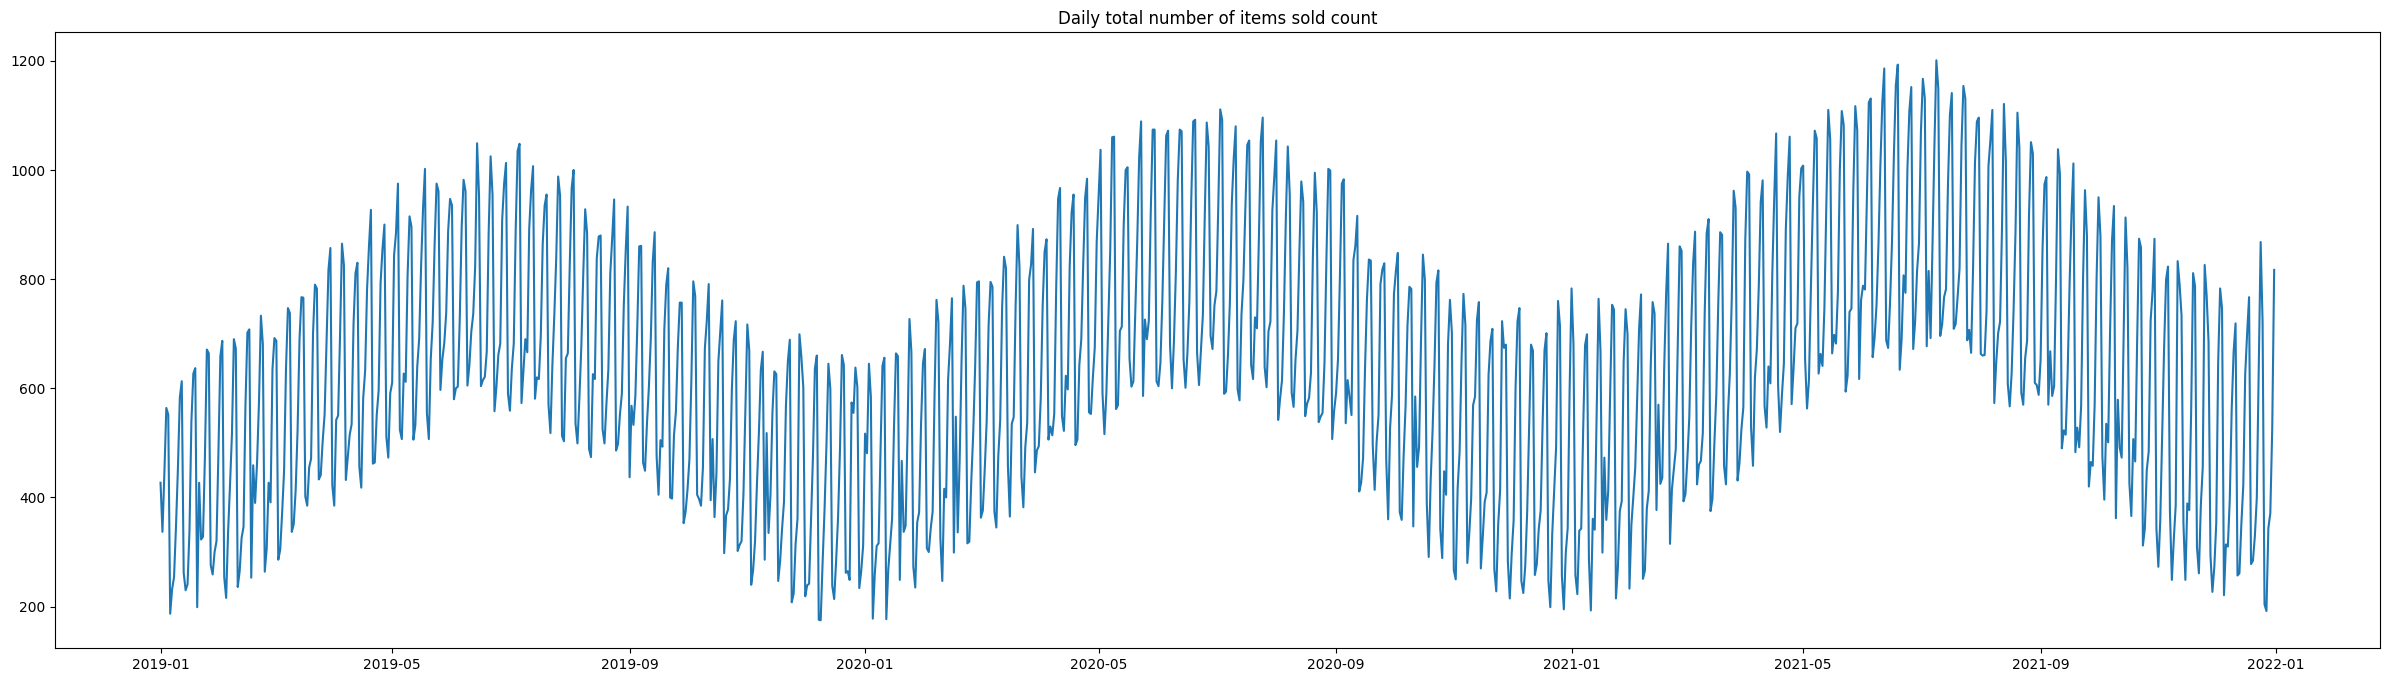

In [15]:
datewise_overall_items_count = df.groupby('date')['item_count'].sum()
plt.figure(figsize=(30,8))
plt.plot(datewise_overall_items_count)
plt.title('Daily total number of items sold count')

#### Analysis of Monthly Revenue Trends (2019–2022)

 - From the line chart covering the period January 2019 to January 2022, we can clearly observe the monthly revenue trends across all restaurants. The data reveals a consistent pattern of growth and seasonal fluctuation over the years.

 - In 2019, revenue showed a steady upward trend in the first half of the year, peaking in July at ₹202,401. However, the revenue gradually declined in the later months, dropping to nearly half of its peak value by year-end.

 - In 2020, the year began with the lowest revenue in January, though still higher than the previous year’s January figures. Revenue climbed again, reaching a new peak in June (₹232,658) — an increase of ₹30,257 compared to 2019’s high. Despite this growth, the familiar pattern of decline resumed in the second half of the year.

 - For 2021, the trend remained consistent: revenue was lowest in January but higher than the January values of both 2019 and 2020, indicating steady year-over-year improvement. The revenue peaked again around July, reaching ₹274,384, which is ₹41,726 higher than the 2020 peak.

 - Overall, the business demonstrates a clear seasonal pattern — revenue tends to be lowest at the beginning of the year, peaks around mid-year (June–July), and then gradually declines towards the end of the year.

 - Despite these cyclical fluctuations, there is a positive long-term growth trend. Each year’s peak and low points are progressively higher than those of the previous year, suggesting that the business is expanding steadily and improving in overall performance.

<Figure size 10000x1500 with 0 Axes>

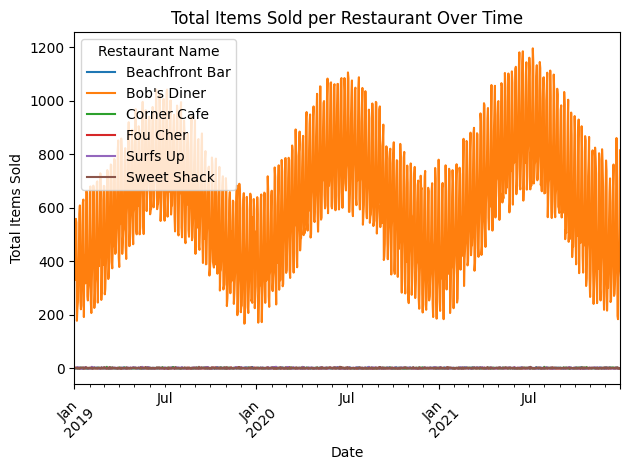

In [16]:
datewise_storewise=(df.groupby(['date','resturants_name'],as_index=False)[['item_count']].sum().rename(columns={'item_count':'total_count'}))

pivot=datewise_storewise.pivot(index='date',columns='resturants_name',values='total_count')

plt.figure(figsize=(100,15))
#pivot.plot(marker='o)
pivot.plot()
plt.title('Total Items Sold per Restaurant Over Time')
plt.xlabel('Date')
plt.ylabel('Total Items Sold')
plt.legend(title='Restaurant Name',loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()

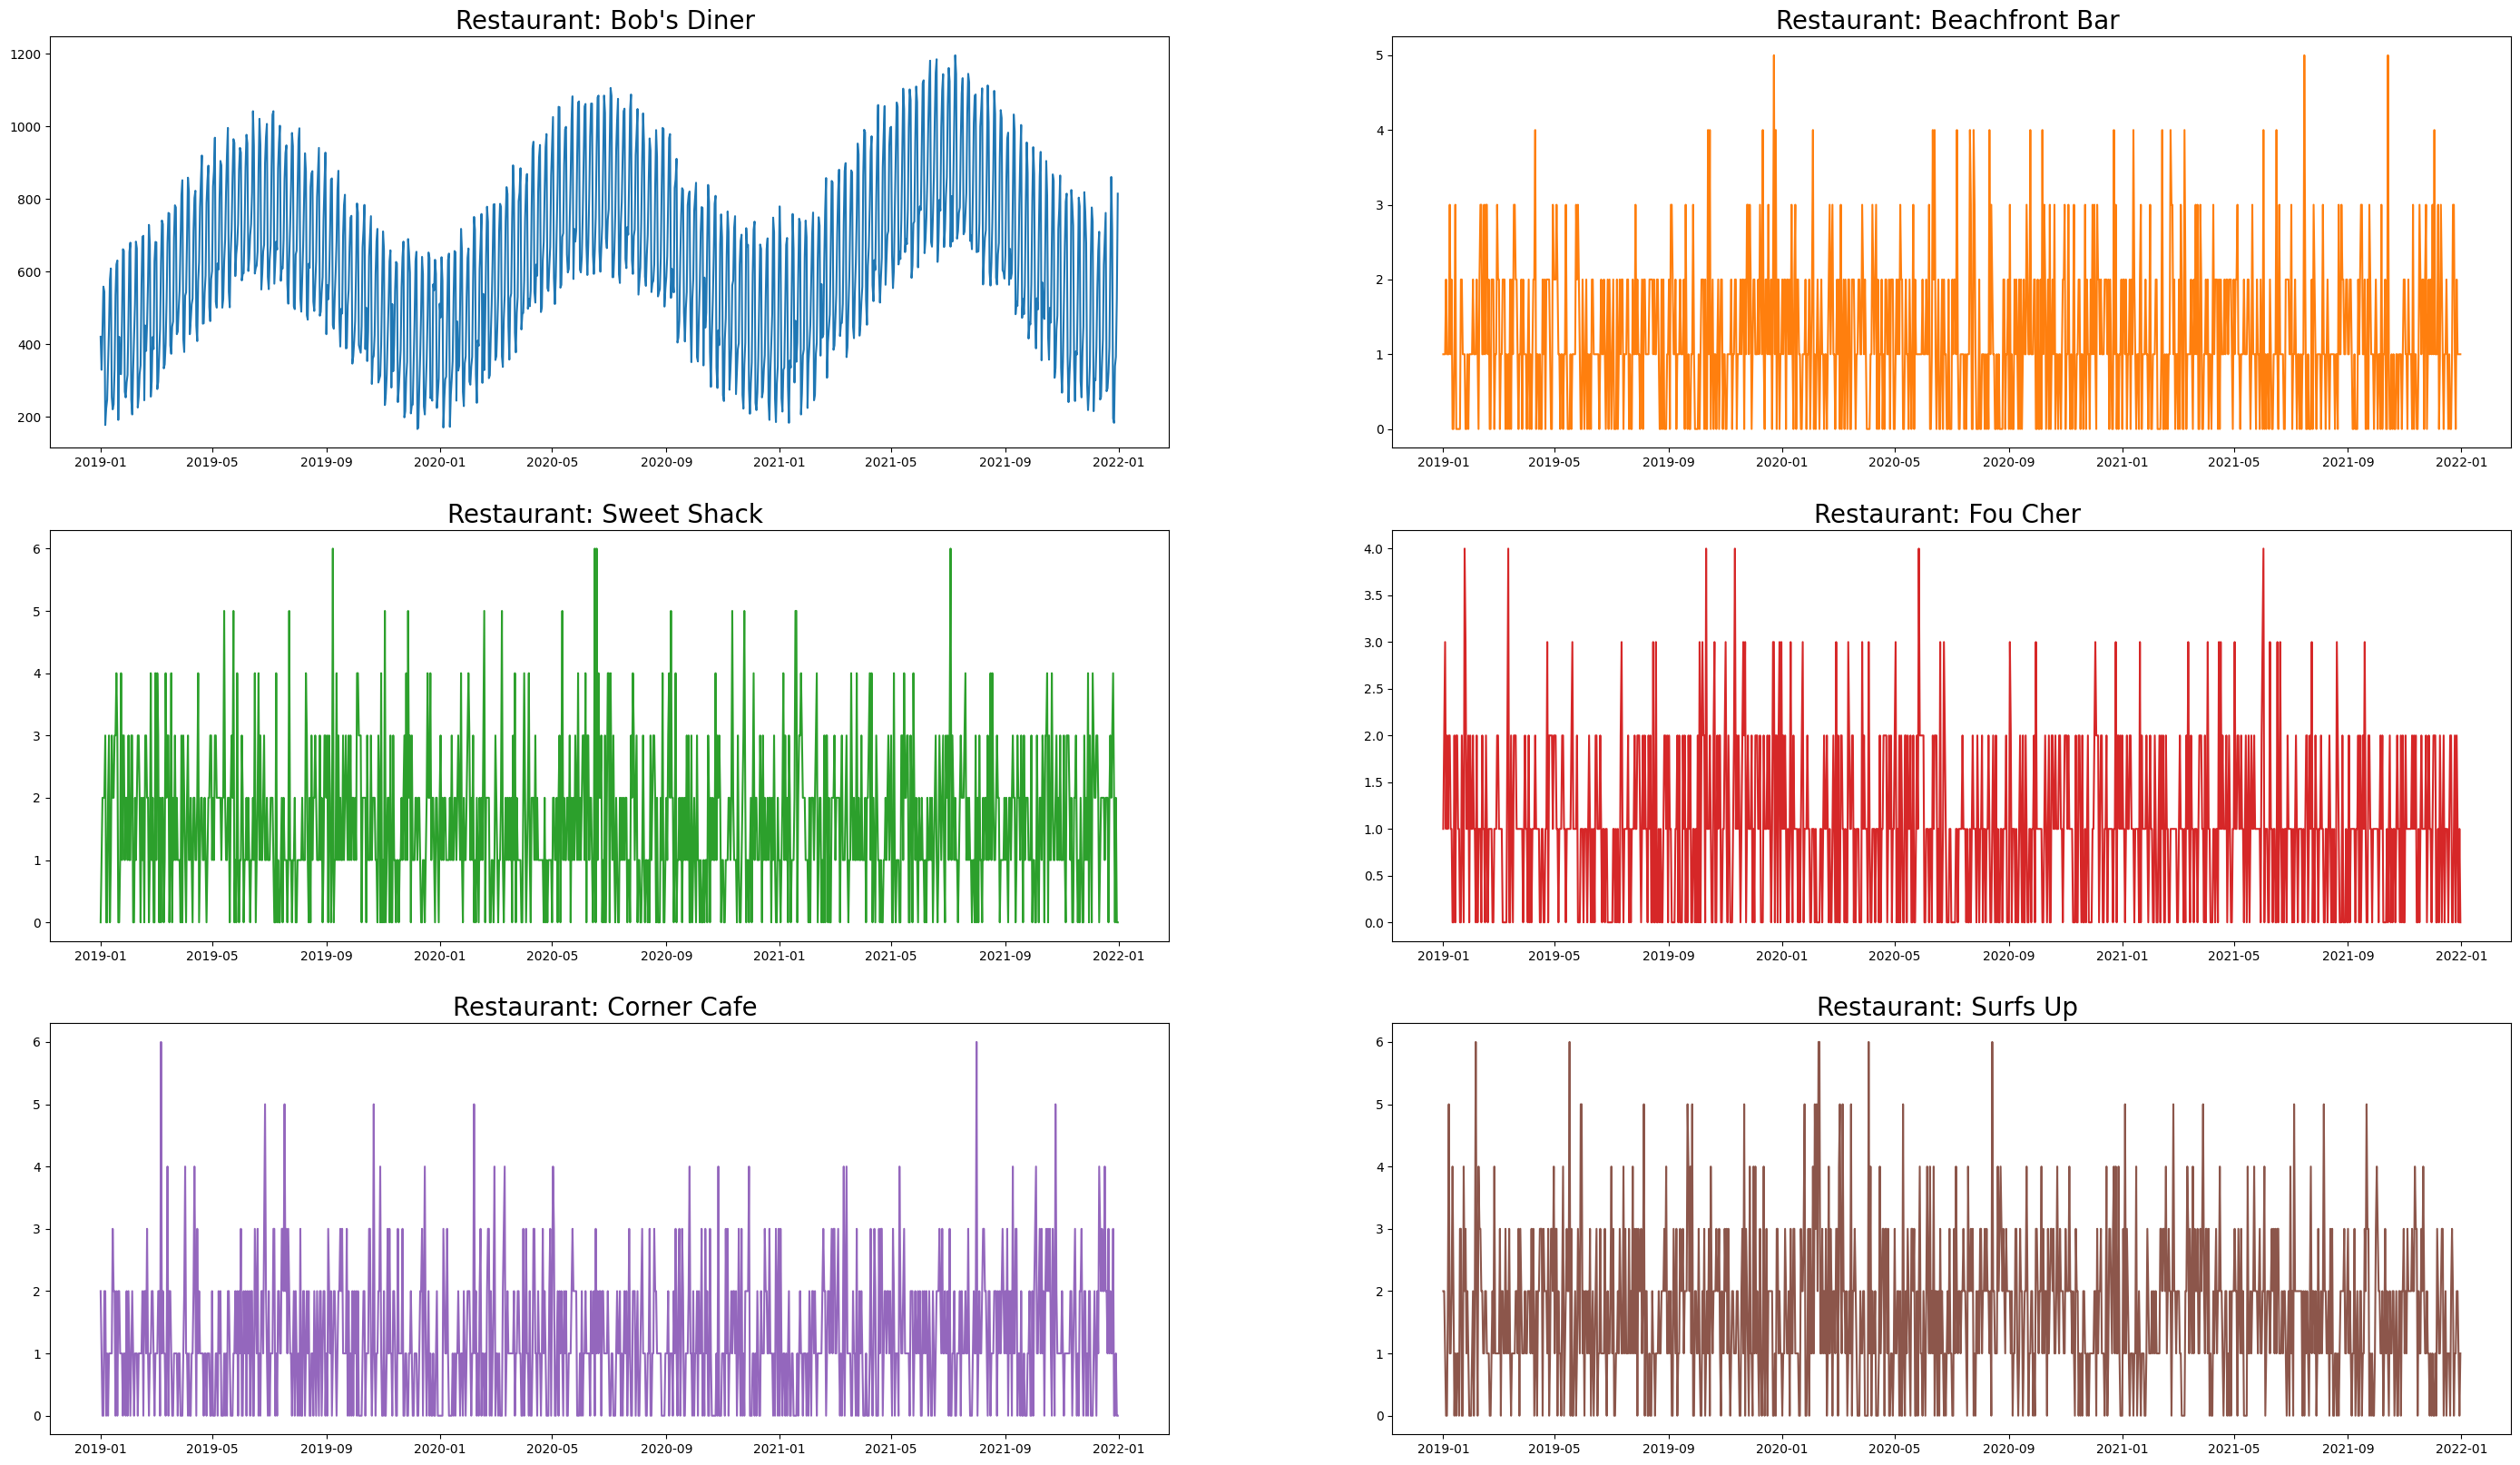

In [17]:
plot_df = df.pivot_table(index = 'date', columns = 'store_id',values = 'item_count', aggfunc = 'sum')
f,ax = plt.subplots(3,2,figsize =(35,20) )
r,c = 0,0
for i in range(1,7):
  ax[r,c].plot(plot_df.loc[:, i], color = pal_list[i-1])
  ax[r,c].set_title('Restaurant: {} '.format(resturants.loc[resturants.id == i, 'name'].values[0]), size = 20)
  c += 1
  if c == 2:
    c = 0
    r +=1

 - The subplot illustrates how sales volumes (i.e., the number of items sold) have fluctuated across the years.

## Find out how sales fluctuate across different days of the week 

In [18]:
import calendar
day_names=list(calendar.day_name)

In [19]:
df['weekday']=df['date'].dt.day_name()

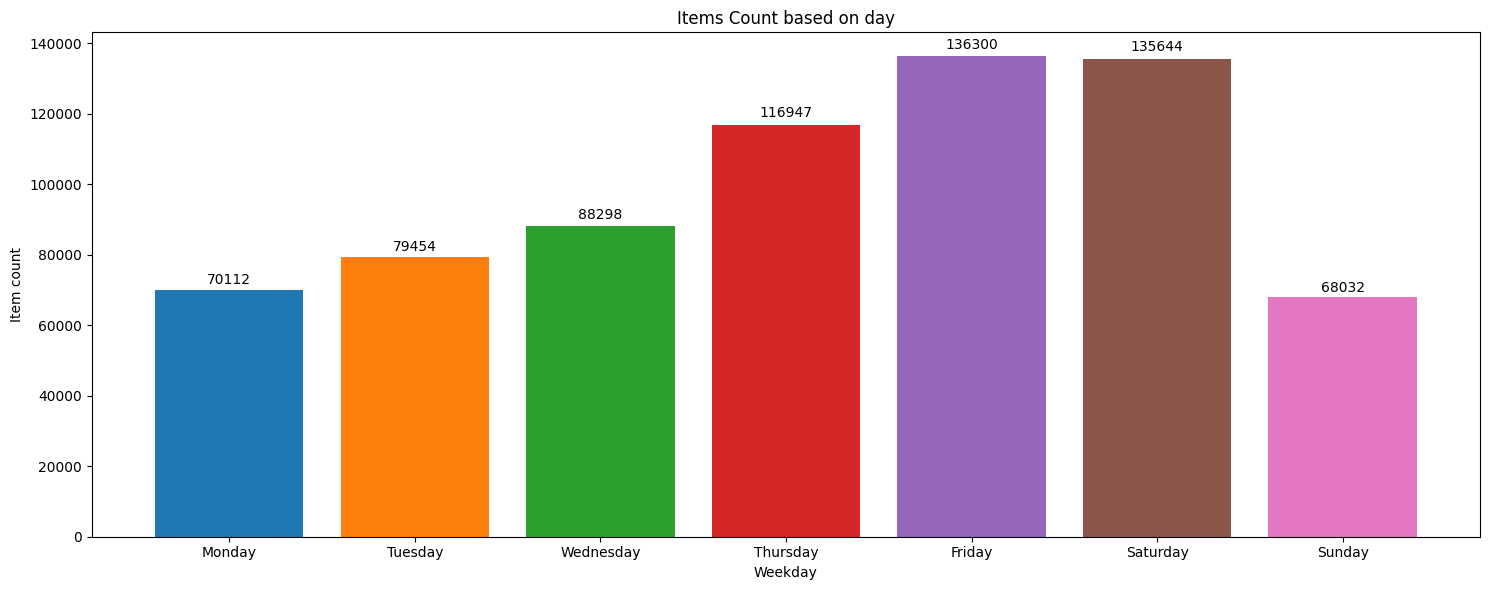

In [20]:
grouped_weekday = df.groupby(['weekday'])['item_count'].sum()
grouped_weekday = grouped_weekday.loc[day_names]  # ordering weekdays
plt.figure(figsize=(15,6))

bars = plt.bar(x=grouped_weekday.index,
               height=grouped_weekday.values,
               color=pal)

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,  # x‐position: center of bar
        height + (0.01 * height),          # y‐position: slightly above the bar
        f'{int(height)}',                  # label text
        ha='center',                       # horizontal alignment
        va='bottom'                        # vertical alignment
    )

plt.title('Items Count based on day')
plt.xlabel('Weekday')
plt.ylabel('Item count')
plt.tight_layout()
plt.show()


### Observations: Total Revenue by Weekday

 - The chart shows the total revenue distribution across weekdays, highlighting Friday and Saturday as the busiest and most profitable days.

 - Friday recorded the highest revenue (₹1,257,338), closely followed by Saturday (₹1,250,574) — suggesting strong weekend sales performance.

 - Thursday (₹1,073,535) also shows a noticeable rise, indicating growing customer activity leading into the weekend.

 - Mid-week days — Tuesday (₹734,598) and Wednesday (₹812,613) — maintain moderate revenue levels, showing consistent business performance.

 - Monday (₹644,800) reflects the lowest revenue, likely due to lower footfall or reduced customer activity at the start of the week.

 - Sunday (₹630,288) shows a dip after the weekend peak, which might indicate fewer dine-ins or reduced spending at week’s end.

 - Overall, the pattern suggests a strong weekend-driven sales cycle, with business momentum building from Thursday through Saturday and declining at the start and end of the week.

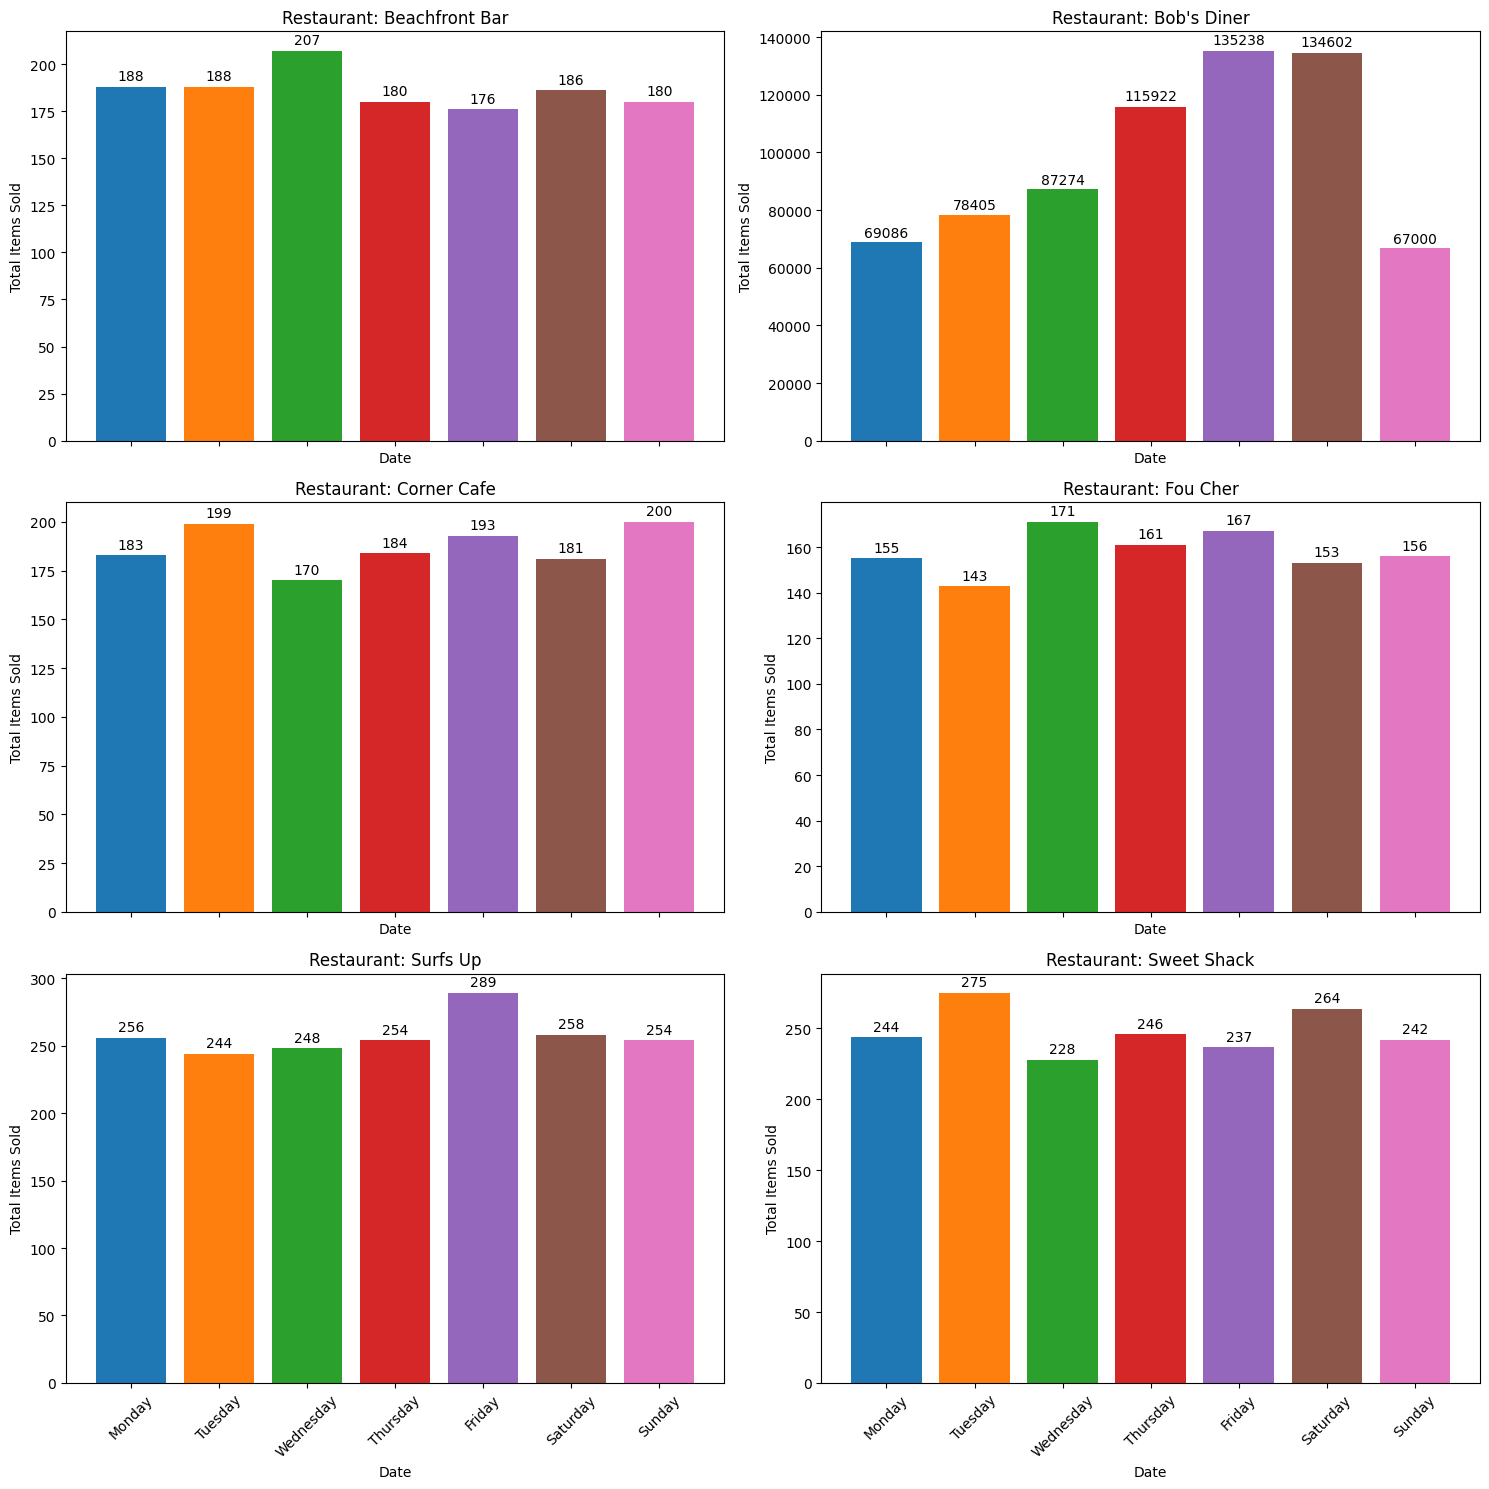

In [21]:
grouped_weekday_storewise = (
    df.groupby(['weekday', 'resturants_name'], as_index=False)['item_count']
      .sum()
      .rename(columns={'item_count': 'total_count'})
)

# Pivot each restaurant is a column
pivot = grouped_weekday_storewise.pivot(index='weekday', columns='resturants_name', values='total_count')

pivot = pivot.reindex(day_names, fill_value=0)

# subplot layout
restaurants = pivot.columns.tolist()
n = len(restaurants)
ncols = 2
nrows = (n + ncols - 1) // ncols  

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, nrows*5), sharex=True)
axes = axes.flatten()

# For each restaurant, plot in its subplot
for ax, store in zip(axes, restaurants):
    s = pivot[store].fillna(0)  # fill NaNs if any
    ax.bar(s.index, s.values, color=pal)
    ax.set_title(f'Restaurant: {store}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Total Items Sold')
    ax.tick_params(axis='x', rotation=45)
    # annotate each bar
    for bar in ax.patches:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width()/2,
            height + (0.01 * height),
            f'{int(height)}',
            ha='center', va='bottom'
        )

#If there are extra axes (when nrows*ncols > n), remove them
for ax in axes[len(restaurants):]:
    fig.delaxes(ax)

plt.tight_layout()

### Observations: Weekday Revenue by Store

 - The chart compares daily revenue patterns across different stores, helping identify which days drive the most business for each location.

 - Bob’s Diner continues to dominate in overall revenue across all weekdays, maintaining strong sales especially from Thursday to Saturday.

 - Smaller outlets like Beachfront Bar, Corner Cafe, Fou Cher, Surfs Up, and Sweet Shack show relatively flat or low revenue patterns, indicating limited weekday variation.

- For most stores, revenue tends to rise steadily toward the weekend, peaking on Fridays and Saturdays, suggesting higher customer activity during these days.

 - Monday and Tuesday generally represent the lowest revenue days for nearly all stores, consistent with typical post-weekend slowdowns.

 - The pattern indicates a strong weekend-driven business cycle, where stores see greater sales momentum from midweek onwards.

 - This analysis highlights the opportunity to introduce weekday promotions or special offers to boost sales during off-peak days like Monday and Tuesday.

## Look for any noticeable trends in the sales data for different months of the year

In [22]:
df['month_name'] = df['date'].dt.month_name()

In [23]:
months = list(calendar.month_name)[1:]

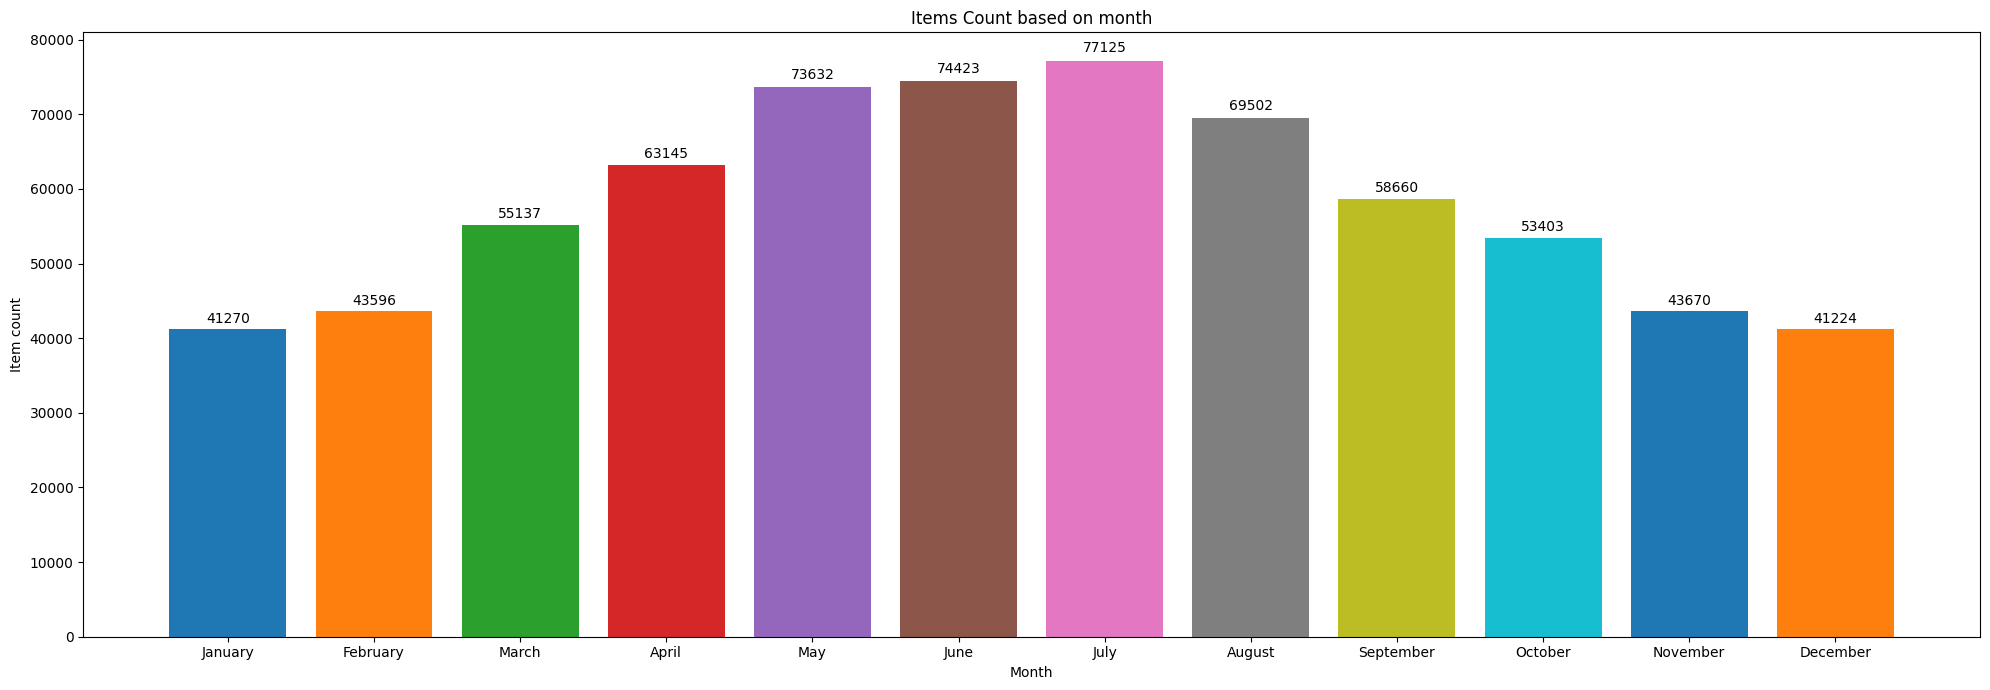

In [24]:
grouped_month=df.groupby(['month_name'])['item_count'].sum()
grouped_month=grouped_month.loc[months].squeeze()

plt.figure(figsize=(20,7))
bars=plt.bar(x=grouped_month.index,height=grouped_month.values,color=pal)

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,  # x‐position: center of bar
        height + (0.01 * height),          # y‐position: slightly above the bar
        f'{int(height)}',                  # label text
        ha='center',                       # horizontal alignment
        va='bottom'                        # vertical alignment
    )

plt.title('Items Count based on month')
plt.xlabel('Month')
plt.ylabel('Item count')
plt.tight_layout()
plt.show()

#### observations about the monthly sales graph:

 - The bar graph illustrates the count of items sold each month from January 2019 through January 2022.

 - The distribution resembles a bell-curve, with sales climbing to a peak mid-year and then tapering off.

 - The highest sales count occurred in July, after which the figures gradually decreased.

 - Sales in January and December were almost the same, indicating a similar low level at both the start and end of the year.

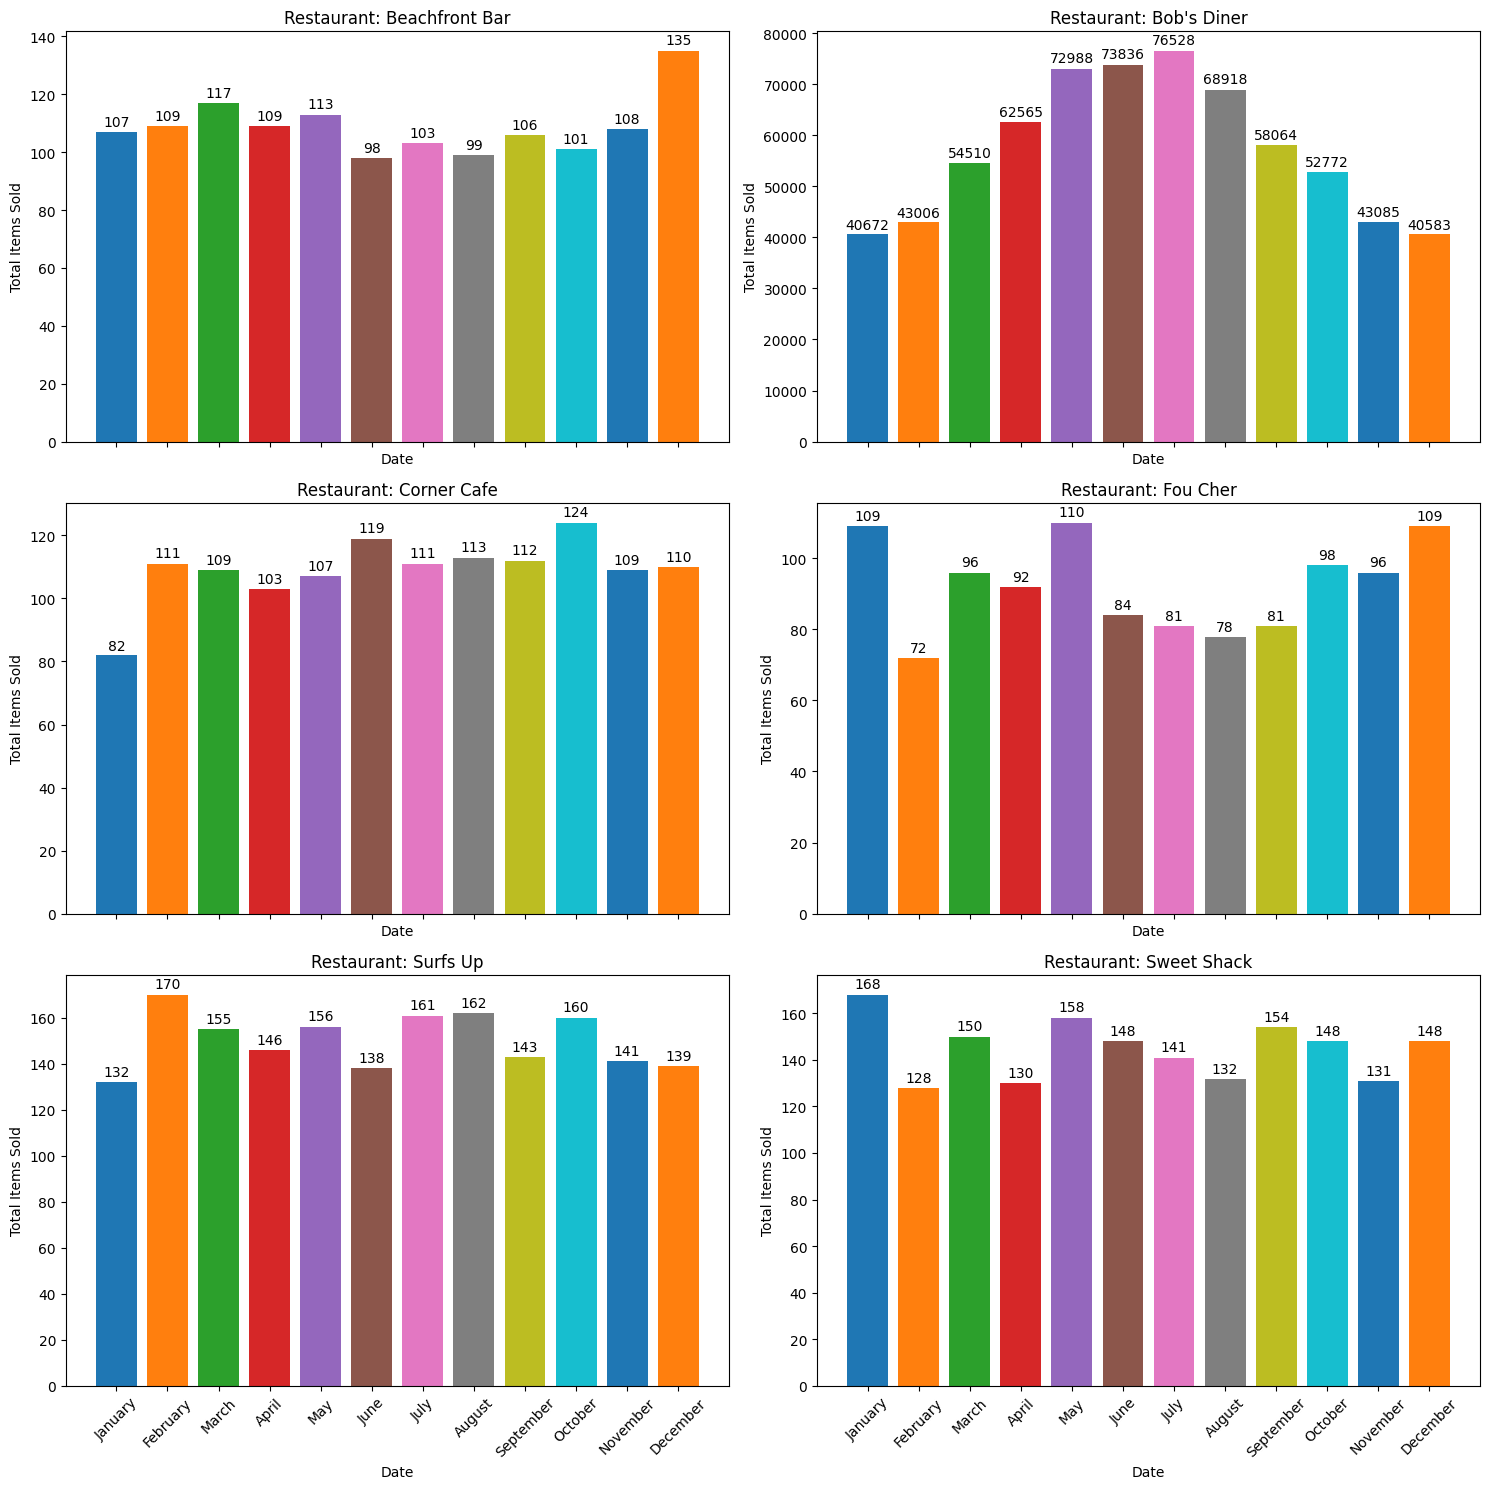

In [25]:
grouped_month_storewise = (
    df.groupby(['month_name', 'resturants_name'], as_index=False)['item_count']
      .sum()
      .rename(columns={'item_count': 'total_count'})
)

# Pivot, each restaurant is a column
pivot = grouped_month_storewise.pivot(index='month_name', columns='resturants_name', values='total_count')

pivot = pivot.reindex(months, fill_value=0)

# subplot layout
restaurants = pivot.columns.tolist()
n = len(restaurants)
ncols = 2
nrows = (n + ncols - 1) // ncols  

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, nrows*5), sharex=True)
axes = axes.flatten()

# For each restaurant, plot in its subplot
for ax, store in zip(axes, restaurants):
    # get the series
    s = pivot[store].fillna(0)  # fill NaNs if any
    ax.bar(s.index, s.values, color=pal)
    ax.set_title(f'Restaurant: {store}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Total Items Sold')
    ax.tick_params(axis='x', rotation=45)
    # annotate each bar
    for bar in ax.patches:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width()/2,
            height + (0.01 * height),
            f'{int(height)}',
            ha='center', va='bottom'
        )

# If there are extra axes (when nrows*ncols > n), remove them
for ax in axes[len(restaurants):]:
    fig.delaxes(ax)

plt.tight_layout()

#### Monthly sales graph Restaurant-wise:

 - For Bob’s Diner, the items‐sold count shows a gradual increase and subsequent decrease, forming a smooth bell-curve type pattern.

 - In contrast, all other restaurants display inconsistent monthly sales patterns: one month’s count jumps, then the next drops, and this up-down oscillation continues throughout the year.

 - To achieve more stable sales over time, restaurants should consider implementing strategic measures including:

 - Forecasting future demand using historical data and seasonality analysis.

 - Adjusting staffing, inventory and menu offerings to align with expected peaks and troughs.

 - Running targeted promotions or loyalty programmes during historically slow months to smooth out fluctuations.

 - By doing so, restaurants can better withstand competition in the long run, rather than relying on sporadic high‐months and struggling during downturns.

## Examine the sales distribution across different quarters averaged over the years. Identify any noticeable patterns.

In [26]:
df['quarter']=df.date.dt.quarter

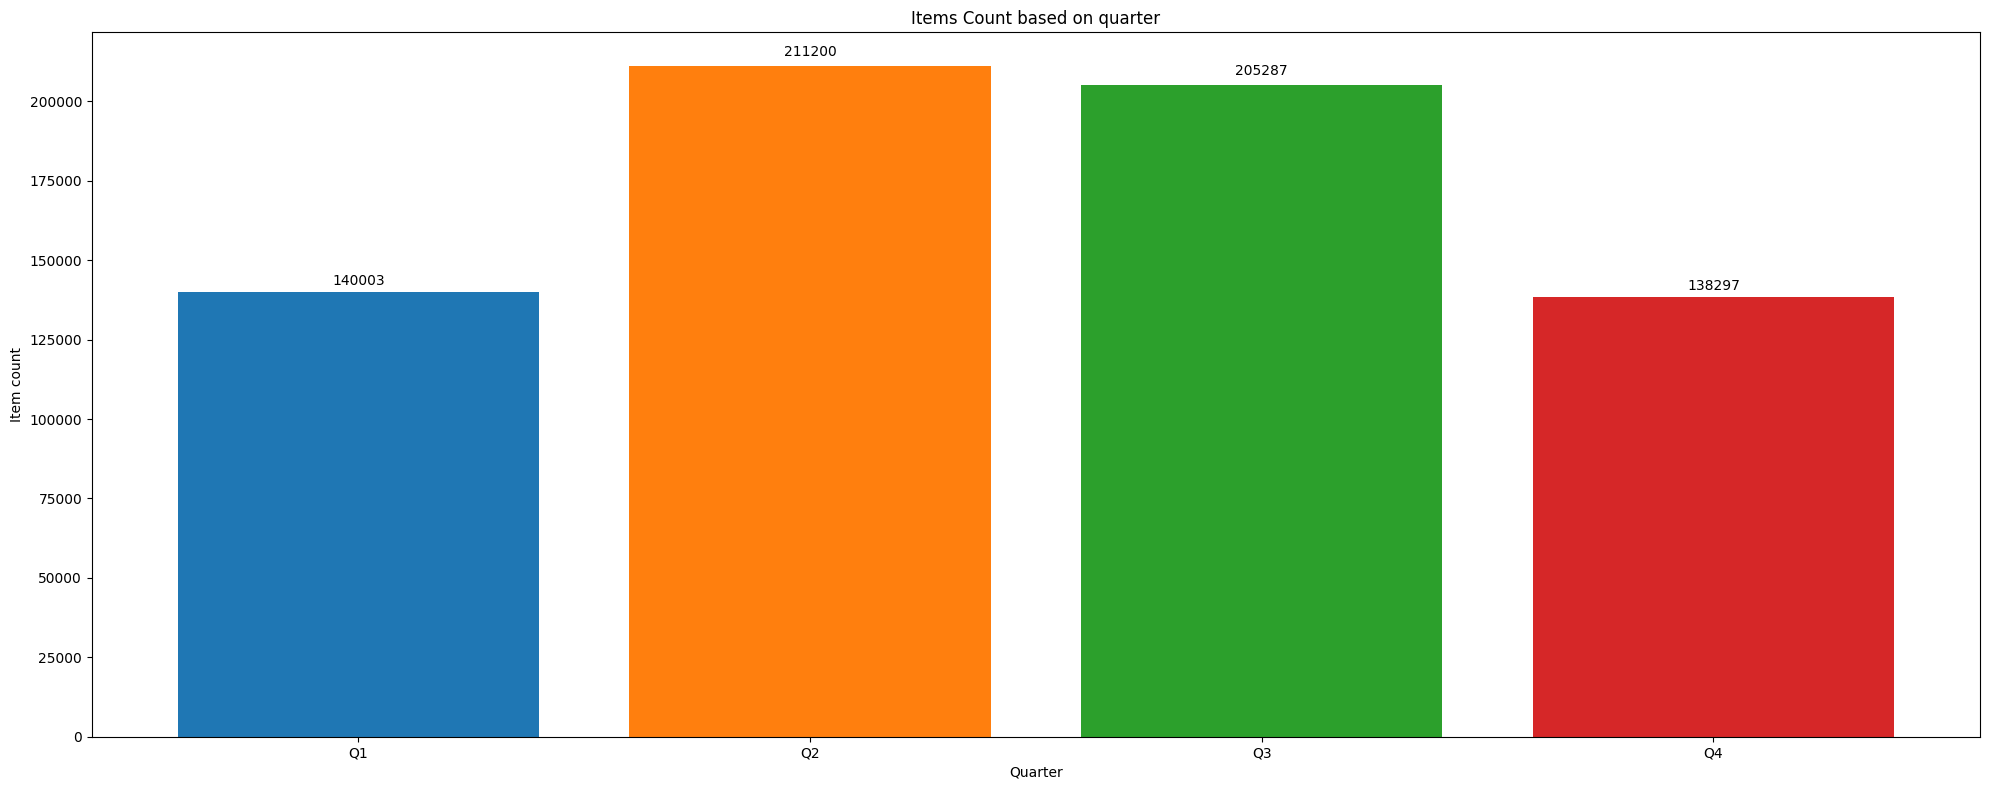

In [27]:
grouped_quarter=df.groupby(['quarter'])['item_count'].sum().squeeze()
plt.figure(figsize=(20,8))
bars=plt.bar(x=grouped_quarter.index,height=grouped_quarter.values,color=pal)
plt.xticks(range(1,5),["Q"+str(i) for i in range(1,5)])

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,  # x‐position: center of bar
        height + (0.01 * height),          # y‐position: slightly above the bar
        f'{int(height)}',                  # label text
        ha='center',                       # horizontal alignment
        va='bottom'                        # vertical alignment
    )

plt.title('Items Count based on quarter')
plt.xlabel('Quarter')
plt.ylabel('Item count')
plt.tight_layout()

#### Quarterly Returns:

 - The bar chart shows the combined quarterly results for all restaurants from Q1 2019 through Q1 2022.

 - Results in Quarter 2 (Q2) were significantly stronger, while Quarter 1 (Q1) and Quarter 4 (Q4) posted very similar performance levels.

 - This pattern suggests a seasonal effect, where mid-year quarters perform better — likely due to higher footfall, favourable weather or marketing campaigns — whereas early- and end-of-year quarters remain relatively flat.

 - To capitalise on this trend, restaurants may consider boosting promotional efforts or special menus in under-performing quarters (Q1 and Q4) and ensuring sufficient capacity/inventory during the strong Q2 period.

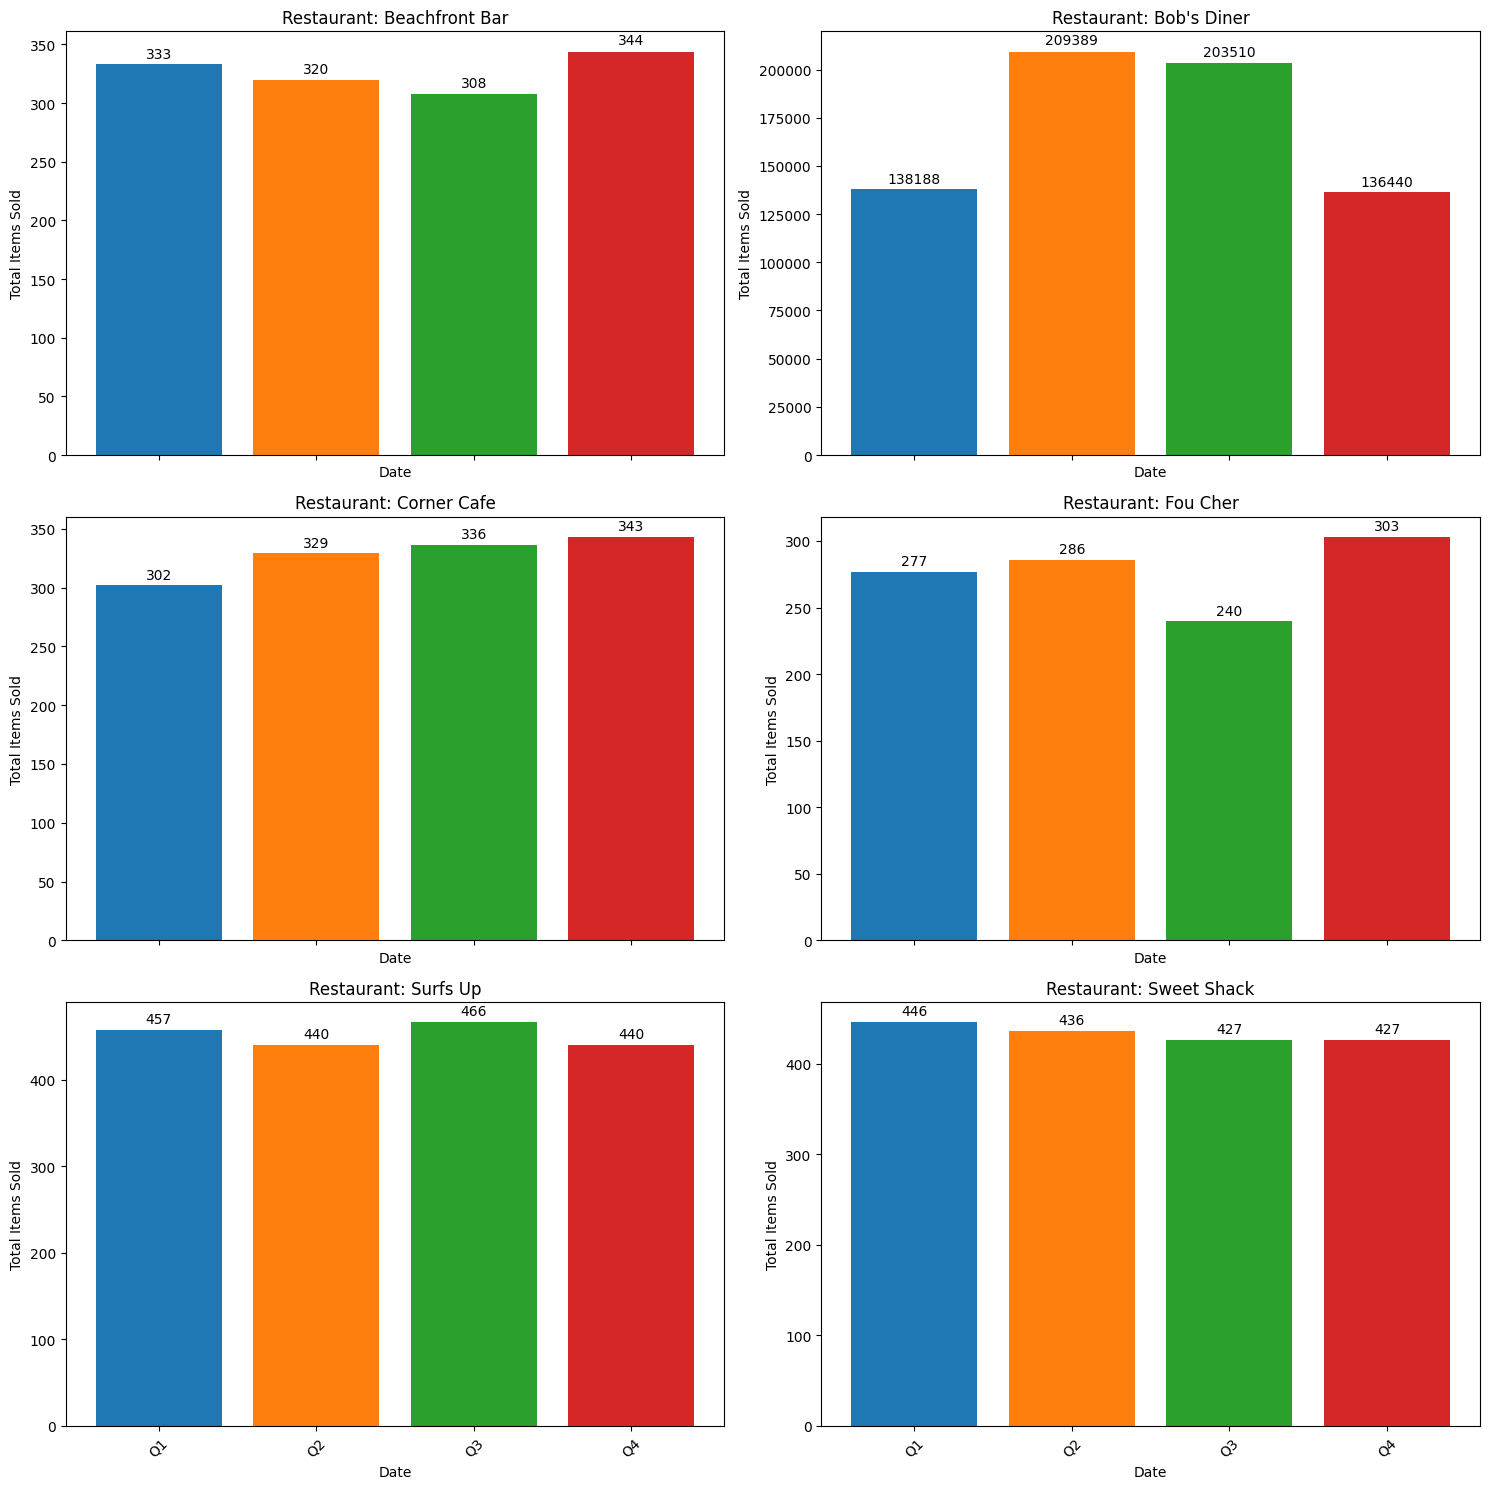

In [28]:
grouped_quarter_storewise = (
    df.groupby(['quarter', 'resturants_name'], as_index=False)['item_count']
      .sum()
      .rename(columns={'item_count': 'total_count'})
)

# Pivot, each restaurant is a column
pivot = grouped_quarter_storewise.pivot(index='quarter', columns='resturants_name', values='total_count')


# subplot layout
restaurants = pivot.columns.tolist()
n = len(restaurants)
ncols = 2
nrows = (n + ncols - 1) // ncols  

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, nrows*5), sharex=True)
axes = axes.flatten()

# For each restaurant, plot in its subplot
for ax, store in zip(axes, restaurants):
    # get the series
    s = pivot[store].fillna(0)  # fill NaNs if any
    ax.bar(s.index, s.values, color=pal)
    ax.set_title(f'Restaurant: {store}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Total Items Sold')
    ax.tick_params(axis='x', rotation=45)
    # annotate each bar
    for bar in ax.patches:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width()/2,
            height + (0.01 * height),
            f'{int(height)}',
            ha='center', va='bottom'
        )

# If there are extra axes (when nrows*ncols > n), remove them
for ax in axes[len(restaurants):]:
    fig.delaxes(ax)
plt.xticks(range(1,5),["Q"+str(i) for i in range(1,5)])

plt.tight_layout()

In [29]:
df['year'] = df.date.dt.year

In [30]:
df['quart-year'] = "Q" + df.quarter.astype(str) + "-" + df.year.astype(str)

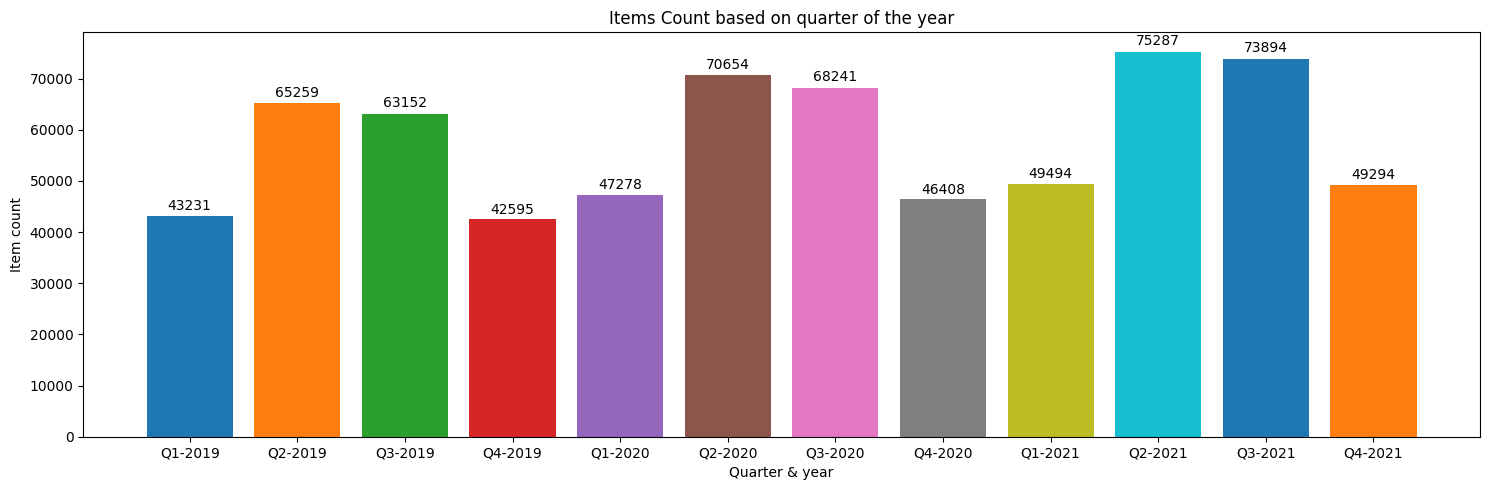

In [31]:
order = ['Q{}-{}'.format(j,i) for i in range(2019, 2022) for j in range(1,5)]
grouped_quarter_year = df.groupby(["quart-year"])[['item_count']].sum()
grouped_quarter_year = grouped_quarter_year.loc[order].squeeze()
plt.figure(figsize = (15,5))
bars=plt.bar(x=grouped_quarter_year.index,height = grouped_quarter_year.values,color = pal)

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,  # x‐position: center of bar
        height + (0.01 * height),          # y‐position: slightly above the bar
        f'{int(height)}',                  # label text
        ha='center',                       # horizontal alignment
        va='bottom'                        # vertical alignment
    )

plt.title('Items Count based on quarter of the year')
plt.xlabel('Quarter & year')
plt.ylabel('Item count')
plt.tight_layout()

 - Consistent Q2 peak: Each year (2019-2021) shows the highest sales in Q2 (65,259 → 70,654 → 75,287), indicating a strong mid-year period.

 - Q1 and Q4 perform similarly: Q1 and Q4 values are close each year (e.g., 43,231 vs 42,595 in 2019; 47,278 vs 46,408 in 2020; 49,494 vs 49,294 in 2021), suggesting comparable sales at start and end of year.

 - Growth across years: All quarters show a year-on-year rise (Q1: 43,231→49,494; Q3: 63,152→73,894), meaning overall sales volumes are increasing.

 - Q3 strong but just below Q2: Q3 is the second-best performing quarter in each year (63,152 → 68,241 → 73,894) and consistently close behind Q2.

 - Clear seasonality effect: The repeating pattern—low in Q1, peak in Q2, strong in Q3, drop in Q4—suggests that the business is subject to predictable seasonal cycles which can inform forecasting and planning.

## Compare the performances of the different restaurants. Find out which restaurant had the most sales and look at the sales for each restaurant across different years, months, and days.

In [32]:
df.groupby('store_id')[['item_count']].sum()

item_count
store_id            
1           687527.0
2             1305.0
3             1736.0
4             1106.0
5             1310.0
6             1803.0

Text(0, 0.5, "Item's served count")

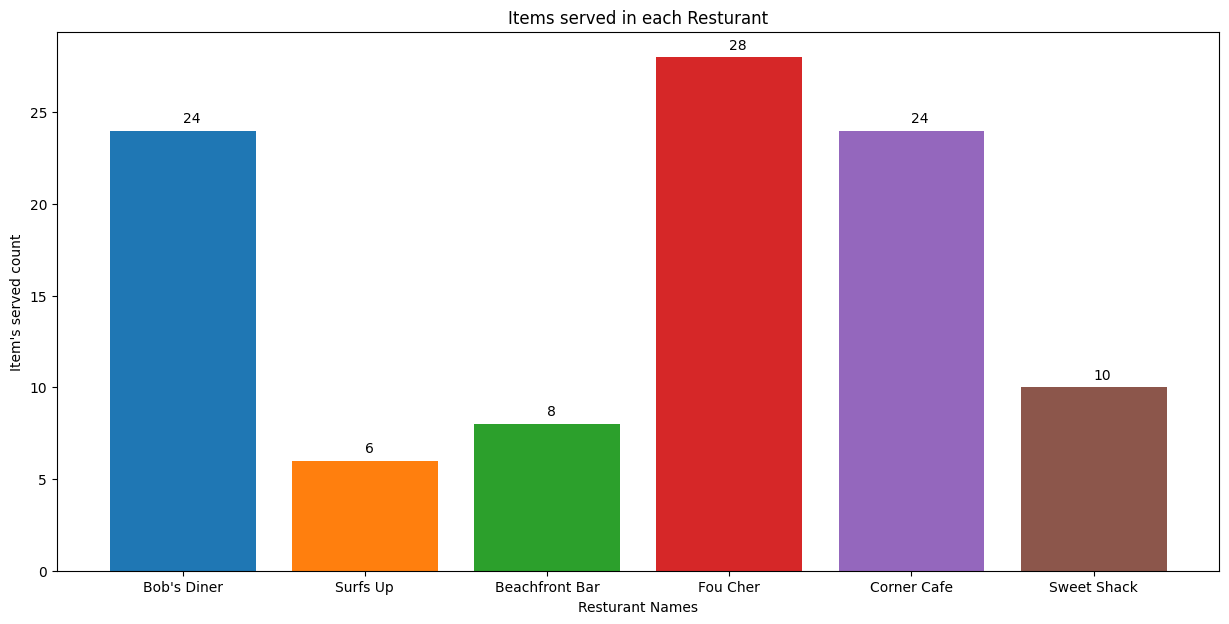

In [33]:
unique_items_served = df.groupby(['store_id']).agg({'item_id' : "nunique"}).squeeze()
plt.figure(figsize = (15,7))
plt.bar(unique_items_served.index, unique_items_served.values, color = pal)
plt.xticks(range(1,7), df['resturants_name'].unique())
for i in range(1,7):
  plt.annotate(unique_items_served[i], xy = (i, unique_items_served[i]+0.45), size = 10)

plt.title('Items served in each Resturant')
plt.xlabel('Resturant Names')
plt.ylabel("Item's served count")

## Compare the performances of the different restaurants. Find out which restaurant had the most sales and look at the sales for each restaurant across different years, months, and days. 

### Comparison of Restaurant Performance

 - Across all restaurants, Bob’s Diner consistently emerges as the top-performing outlet, generating the highest revenue by a large margin. Its monthly and yearly totals surpass all other stores combined, making it the primary revenue driver for the business.

 - Other restaurants — Beachfront Bar, Corner Cafe, Fou Cher, Surfs Up, and Sweet Shack — contribute only a small fraction (less than 2–3%) of total sales, with relatively stable but low performance levels.

### Yearly Revenue Trends

 - Bob’s Diner shows a steady year-over-year revenue increase, indicating strong growth and a loyal customer base.

 - Smaller outlets maintain consistent but modest revenue, with no major year-to-year growth spikes, suggesting limited scalability or local reach.

 - The gap between Bob’s Diner and other restaurants has widened each year, highlighting its growing dominance in the company’s revenue structure.

### Monthly Revenue Trends

 - Revenue across all restaurants shows a seasonal pattern — lowest at the start of each year (January–February) and peaking around mid-year (June–July).

 - Bob’s Diner follows this trend but at a much larger scale, indicating that seasonality impacts all stores, though its effect is more pronounced for the flagship outlet.

 - Smaller restaurants have less pronounced monthly variation, likely due to lower customer volume and fewer large-scale promotions.

### Weekday Revenue Patterns

 - For all stores, Friday and Saturday record the highest sales, suggesting peak customer activity during weekends.

 - Monday and Tuesday are generally the slowest days, consistent with lower weekday footfall.

 - Bob’s Diner maintains strong performance throughout the week, showing steady weekday traffic in addition to weekend surges — a sign of consistent customer retention.

## Identify the most popular items overall and the stores where they are being sold. Also, find out the most popular item at each store

Text(0, 0.5, 'Item count')

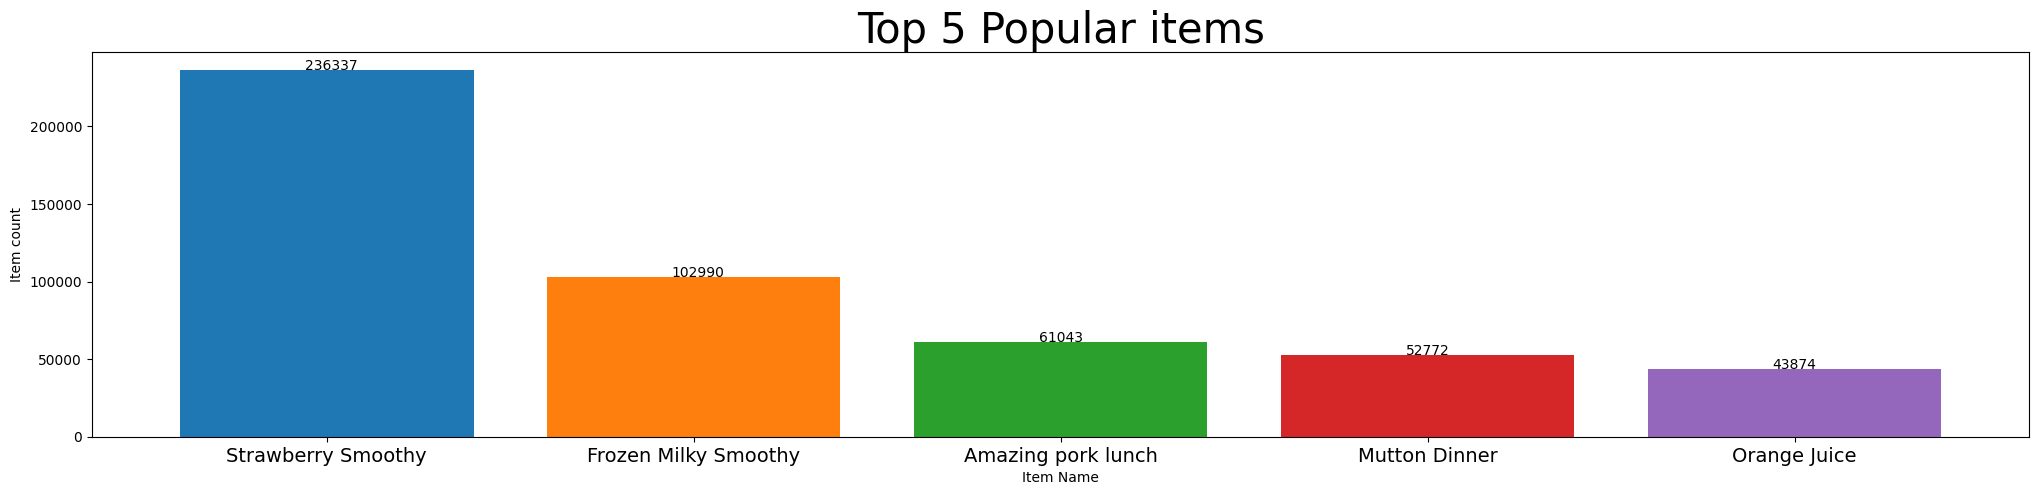

In [34]:
plot_data = df.groupby('item_id')[['item_count']].sum().sort_values('item_count',ascending = False).reset_index()[:5]

final_plot_data = pd.merge(plot_data, items, left_on = 'item_id', right_on = 'id', how = 'left')[['item_id', 'item_count', 'name', 'kcal', 'cost', 'store_id']]

plt.figure(figsize = (25,5))

plt.bar(x=final_plot_data.name, height=final_plot_data.item_count, color = pal_list)

plt.title('Top 5 Popular items', size= 30)

for k in range(5):
  val = final_plot_data.loc[k,'item_count']
  plt.annotate('{:0.0f}'.format(val), xy = (k-0.06, val), size = 10)
    
plt.xticks(size = 14)
plt.xlabel("Item Name")
plt.ylabel("Item count")

### Popular items restaurant wise

In [35]:
count_data = df.pivot_table(index = 'item_id', columns = 'store_id',values = 'item_count', aggfunc = 'sum', fill_value = 0 )
item_ids = count_data.index[count_data.values.argmax(axis = 0)]

In [36]:
pop_items = items.loc[items.id.isin(item_ids), ['store_id', 'id', 'name', 'kcal', 'cost']]
pop_data = pd.merge(pop_items, resturants, how = 'left', left_on = 'store_id', right_on = 'id', suffixes = ('_item', '_resturants'))
pop_data['count'] = count_data.loc[item_ids,].sum(axis = 0).reset_index().iloc[:,1]
pop_data = pop_data[['name_resturants', 'name_item', 'kcal', 'cost', 'count']]
pop_data

name_resturants                      name_item  kcal   cost     count
0     Bob's Diner             Strawberry Smoothy   145   2.89  236337.0
1  Beachfront Bar        Fantastic Milky Smoothy   318   2.91    1147.0
2     Sweet Shack                Awesome Smoothy    78   1.39    1692.0
3     Corner Cafe           Frozen Milky Smoothy   211   3.98     298.0
4        Fou Cher  Blue Ribbon Fruity Vegi Lunch   881  53.98     273.0
5        Surfs Up             Awesome Soft Drink   248   3.06     997.0

 - From the above dataframe, we can identify each restaurant’s most popular item and note its corresponding kcal value, cost, and items-sold count over the last three years.

## Determine if the store with the highest sales volume is also making the most money per day.

In [37]:
df.groupby('store_id')[['item_count']].sum().reset_index()

store_id  item_count
0         1    687527.0
1         2      1305.0
2         3      1736.0
3         4      1106.0
4         5      1310.0
5         6      1803.0

In [38]:
df.pivot_table(index = 'store_id', columns = 'year', values = 'item_count', aggfunc = 'sum')

year          2019      2020      2021
store_id                              
1         211799.0  230191.0  245537.0
2            439.0     437.0     429.0
3            590.0     554.0     592.0
4            392.0     357.0     357.0
5            423.0     415.0     472.0
6            594.0     627.0     582.0

In [39]:
df['sales_amnt'] = df.item_count * df.price
df.pivot_table(index = 'store_id', columns = 'year', values = 'sales_amnt', aggfunc = 'sum')

year            2019        2020        2021
store_id                                    
1         1849483.49  2112331.91  2375460.29
2            1281.85     1267.21     1247.14
3             872.59      828.65      877.03
4            9698.80     8590.87     9595.70
5            5292.93     5347.71     5910.79
6            5132.65     5314.43     5204.41

 - Bob's Diner is highest grossing in numbers as well as sales value.

In [40]:
count_order = df.pivot_table(index = 'store_id',  values = 'sales_amnt', aggfunc = 'sum').squeeze()   # Based on Sales ammount
count_order_rest = count_order.sort_values(ascending = False).index
resturants.set_index('id').loc[count_order_rest]

name
store_id                
1            Bob's Diner
4               Fou Cher
5            Corner Cafe
6               Surfs Up
2         Beachfront Bar
3            Sweet Shack

 - The dataframe is sorted in descending order based on each restaurant’s total revenue generated.

In [41]:
sales_order = df.pivot_table(index = 'store_id',  values = 'item_count', aggfunc = 'sum').squeeze()   # Based on Items sold quantity
sales_order_rest = sales_order.sort_values(ascending = False).index
resturants.set_index('id').loc[sales_order_rest]

name
store_id                
1            Bob's Diner
6               Surfs Up
3            Sweet Shack
5            Corner Cafe
2         Beachfront Bar
4               Fou Cher

 - The dataframe is sorted in descending order based on each restaurant’s total items sold count.

## Identify the most expensive item at each restaurant and find out its calorie count.

In [42]:
items.sort_values("cost",ascending = False)[:5]

id  store_id                                               name  kcal  \
79  80         4                      Blue Ribbon Fruity Vegi Lunch   881   
2    3         1                                  Sweet Fruity Cake   931   
55  56         1                    Sea Bass with Vegetables Dinner   613   
96  97         4  Original Fruity Cod with Bread and Vegetables ...   744   
33  34         4                                  Sweet Savory Cake   721   

     cost  
79  53.98  
2   29.22  
55  28.75  
96  28.65  
33  27.47

##  Machine learning

##  Build and compare linear regression, random forest, and XGBoost models for predictions

In [43]:
df.date.describe()

count                 109600
mean     2020-07-01 12:00:00
min      2019-01-01 00:00:00
25%      2019-10-01 18:00:00
50%      2020-07-01 12:00:00
75%      2021-04-01 06:00:00
max      2021-12-31 00:00:00
Name: date, dtype: object

In [44]:
ts = df.groupby('date')[['item_count']].sum().squeeze()

In [45]:
df.head()

date  item_id  price  item_count  store_id  \
0 2019-01-01        3  29.22         2.0         1   
1 2019-01-01        4  26.42        22.0         1   
2 2019-01-01       12   4.87         7.0         1   
3 2019-01-01       13   4.18        12.0         1   
4 2019-01-01       16   3.21       136.0         1   

                         item_name  kcal resturants_name  weekday month_name  \
0                Sweet Fruity Cake   931     Bob's Diner  Tuesday    January   
1  Amazing Steak Dinner with Rolls   763     Bob's Diner  Tuesday    January   
2             Fantastic Sweet Cola   478     Bob's Diner  Tuesday    January   
3          Sweet Frozen Soft Drink   490     Bob's Diner  Tuesday    January   
4             Frozen Milky Smoothy   284     Bob's Diner  Tuesday    January   

   quarter  year quart-year  sales_amnt  
0        1  2019    Q1-2019       58.44  
1        1  2019    Q1-2019      581.24  
2        1  2019    Q1-2019       34.09  
3        1  2019    Q1-2019       50.16  
4        1  2019    Q1-2019      436.56

In [46]:
time_series = df.groupby(['date']).agg({'item_count':'sum', 'weekday': lambda x :x.unique()[0],
                            'quarter' : lambda x :x.unique()[0], 'year': lambda x :x.unique()[0],
                            'month_name' : lambda x :x.unique()[0],
                            'year':lambda x :x.unique()[0]})

In [47]:
time_series['day_year'] = time_series.index.day_of_year
time_series['day_month'] = time_series.index.day
time_series['week_num'] = time_series.index.isocalendar().week.astype(int)
time_series

item_count    weekday  quarter  year month_name  day_year  \
date                                                                    
2019-01-01       427.0    Tuesday        1  2019    January         1   
2019-01-02       337.0  Wednesday        1  2019    January         2   
2019-01-03       445.0   Thursday        1  2019    January         3   
2019-01-04       564.0     Friday        1  2019    January         4   
2019-01-05       552.0   Saturday        1  2019    January         5   
...                ...        ...      ...   ...        ...       ...   
2021-12-27       192.0     Monday        4  2021   December       361   
2021-12-28       344.0    Tuesday        4  2021   December       362   
2021-12-29       371.0  Wednesday        4  2021   December       363   
2021-12-30       527.0   Thursday        4  2021   December       364   
2021-12-31       817.0     Friday        4  2021   December       365   

            day_month  week_num  
date                             
2019-01-01          1         1  
2019-01-02          2         1  
2019-01-03          3         1  
2019-01-04          4         1  
2019-01-05          5         1  
...               ...       ...  
2021-12-27         27        52  
2021-12-28         28        52  
2021-12-29         29        52  
2021-12-30         30        52  
2021-12-31         31        52  

[1096 rows x 8 columns]

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

In [49]:
day_names

['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [50]:
months

['January',
 'February',
 'March',
 'April',
 'May',
 'June',
 'July',
 'August',
 'September',
 'October',
 'November',
 'December']

In [51]:
ord_enc = OrdinalEncoder(categories = [months, day_names])
ord_enc.fit(time_series[['month_name', 'weekday']])
time_series[['month_name', 'weekday']] = ord_enc.transform(time_series[['month_name', 'weekday']])

In [52]:
time_series

item_count  weekday  quarter  year  month_name  day_year  \
date                                                                   
2019-01-01       427.0      1.0        1  2019         0.0         1   
2019-01-02       337.0      2.0        1  2019         0.0         2   
2019-01-03       445.0      3.0        1  2019         0.0         3   
2019-01-04       564.0      4.0        1  2019         0.0         4   
2019-01-05       552.0      5.0        1  2019         0.0         5   
...                ...      ...      ...   ...         ...       ...   
2021-12-27       192.0      0.0        4  2021        11.0       361   
2021-12-28       344.0      1.0        4  2021        11.0       362   
2021-12-29       371.0      2.0        4  2021        11.0       363   
2021-12-30       527.0      3.0        4  2021        11.0       364   
2021-12-31       817.0      4.0        4  2021        11.0       365   

            day_month  week_num  
date                             
2019-01-01          1         1  
2019-01-02          2         1  
2019-01-03          3         1  
2019-01-04          4         1  
2019-01-05          5         1  
...               ...       ...  
2021-12-27         27        52  
2021-12-28         28        52  
2021-12-29         29        52  
2021-12-30         30        52  
2021-12-31         31        52  

[1096 rows x 8 columns]

### Generate Test Data

In [53]:
train = time_series[time_series.index < '2021-07-01']
test = time_series[time_series.index >= '2021-07-01']

In [54]:
y_var = 'item_count'
x_vars = time_series.drop(columns = 'item_count').columns

In [55]:
X_train = train[x_vars]
Y_train = train[y_var]
X_test = test[x_vars]
Y_test = test[y_var]

### Linear Regression

In [56]:
lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [57]:
test['lr_pred'] = lr.predict(X_test)

C:\Users\harsh\AppData\Local\Temp\ipykernel_15432\3421247276.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['lr_pred'] = lr.predict(X_test)


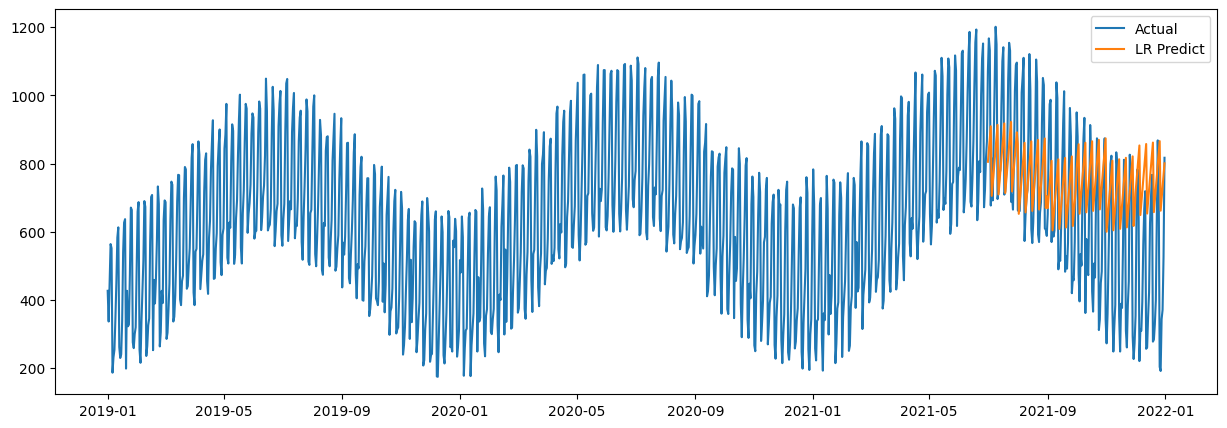

In [58]:
plt.figure(figsize = (15,5))
plt.plot(time_series.item_count, label = "Actual")
plt.plot(test.lr_pred, label = "LR Predict")
plt.legend()
plt.show()

 - In the plot above, the actual items-sold counts and the model’s predicted values are shown side-by-side — it is clear that the linear regression model fails to capture the true trend accurately.

In [59]:
lr_rmse = mean_squared_error(y_true = test.item_count, y_pred = test.lr_pred, squared = False)
lr_mae = mean_absolute_error(y_true = test.item_count, y_pred = test.lr_pred)
lr_r2_score = r2_score(y_true = test.item_count, y_pred = test.lr_pred)
print("Linear Regression :\nRMSE : {:.2f}\nMAE : {:.2f}\nR2_Score : {:.2f}".format(lr_rmse,lr_mae,lr_r2_score*100))

Linear Regression :
RMSE : 244.21
MAE : 196.04
R2_Score : 7.65


C:\Users\harsh\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [60]:
results = pd.DataFrame([lr_rmse, lr_mae,lr_r2_score*100], index = ['RMSE', 'MAE', 'R2_Score'], columns = ['Linear Regression']).round(2)
results

Linear Regression
RMSE                 244.21
MAE                  196.04
R2_Score               7.65

### Random Forest

In [61]:
rf = RandomForestRegressor(n_estimators=100, max_depth=20)
rf.fit(X_train, Y_train)

RandomForestRegressor(max_depth=20)

In [62]:
test['rf_pred'] = rf.predict(X_test)

C:\Users\harsh\AppData\Local\Temp\ipykernel_15432\582745053.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['rf_pred'] = rf.predict(X_test)


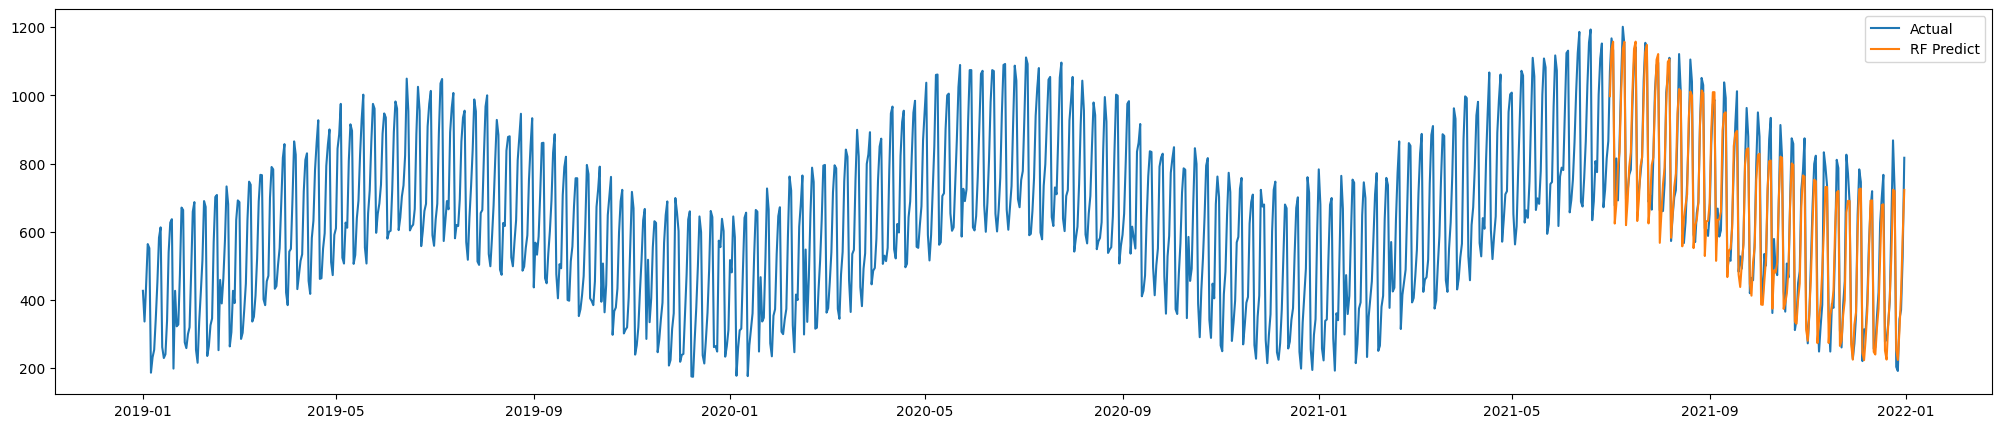

In [63]:
plt.figure(figsize = (25,5))
plt.plot(time_series.item_count, label = "Actual")
plt.plot(test.rf_pred, label = "RF Predict")
plt.legend()
plt.show()

 - We can clearly see how effectively the random forest model has learned — its predictions are closely aligned with the actual test-values.

In [64]:
rf_rmse = mean_squared_error(y_true = test.item_count, y_pred = test.rf_pred, squared = False)
rf_mae = mean_absolute_error(y_true = test.item_count, y_pred = test.rf_pred)
rf_r2_score = r2_score(y_true = test.item_count, y_pred = test.rf_pred)
print("Random Forest Regression :\nRMSE : {:.2f}\nMAE : {:.2f}\nR2_Score : {:.2f}".format(rf_rmse,rf_mae,rf_r2_score*100))

Random Forest Regression :
RMSE : 59.18
MAE : 46.71
R2_Score : 94.58


C:\Users\harsh\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [65]:
results['Random Forest'] = [rf_rmse,rf_mae,rf_r2_score*100]
results.round(2)

Linear Regression  Random Forest
RMSE                 244.21          59.18
MAE                  196.04          46.71
R2_Score               7.65          94.58

### XGBoost

In [66]:
xgb = xgb.XGBRegressor(base_score=0.5,      # The initial prediction score (global bias) before any trees are added  
                       booster='gbtree',    # Use tree-based boosting (rather than linear)  
                       n_estimators=1000,    # Maximum number of boosting (tree) rounds/trees   
                       early_stopping_rounds=50,   
                       objective='reg:linear',     # Learning task and loss → regression with linear objective  
                       max_depth=3,            # Maximum depth of each individual tree (controls complexity)  
                       learning_rate=0.01)     # Step size shrinkage (called eta) to prevent overfitting  

  
xgb.fit(X_train, Y_train,                        
        eval_set=[(X_train, Y_train), (X_test, Y_test)],    
        verbose=100)                                      # Print evaluation metric every 100 rounds  

[0]	validation_0-rmse:660.07829	validation_1-rmse:709.01212


C:\Users\harsh\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:44:29] WARNING: C:\b\abs_d97hy_84m6\croot\xgboost-split_1749630932152\work\src\objective\regression_obj.cu:250: reg:linear is now deprecated in favor of reg:squarederror.
  self.starting_round = model.num_boosted_rounds()


[100]	validation_0-rmse:262.51190	validation_1-rmse:311.53220
[200]	validation_0-rmse:121.36888	validation_1-rmse:171.11193
[300]	validation_0-rmse:71.72975	validation_1-rmse:105.03640
[400]	validation_0-rmse:52.50055	validation_1-rmse:78.37923
[500]	validation_0-rmse:44.19461	validation_1-rmse:71.59216
[591]	validation_0-rmse:40.35475	validation_1-rmse:72.11224


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.01, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=1000,
             n_jobs=None, num_parallel_tree=None, ...)

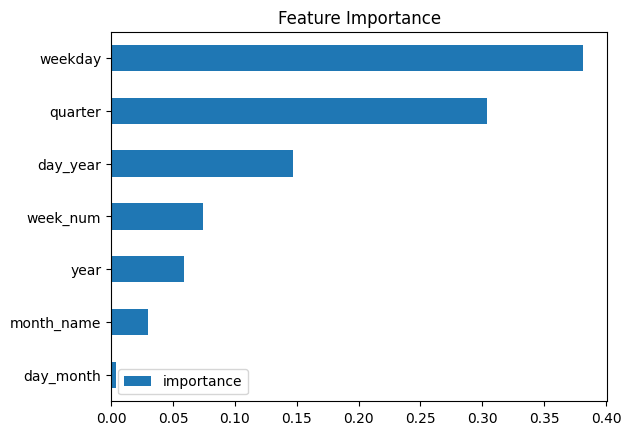

In [67]:
importance = pd.DataFrame(data=xgb.feature_importances_,
             index=xgb.get_booster().feature_names,
             columns=['importance'])
importance.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

In [68]:
test['xgb_pred'] = xgb.predict(X_test)

C:\Users\harsh\AppData\Local\Temp\ipykernel_15432\5488039.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['xgb_pred'] = xgb.predict(X_test)


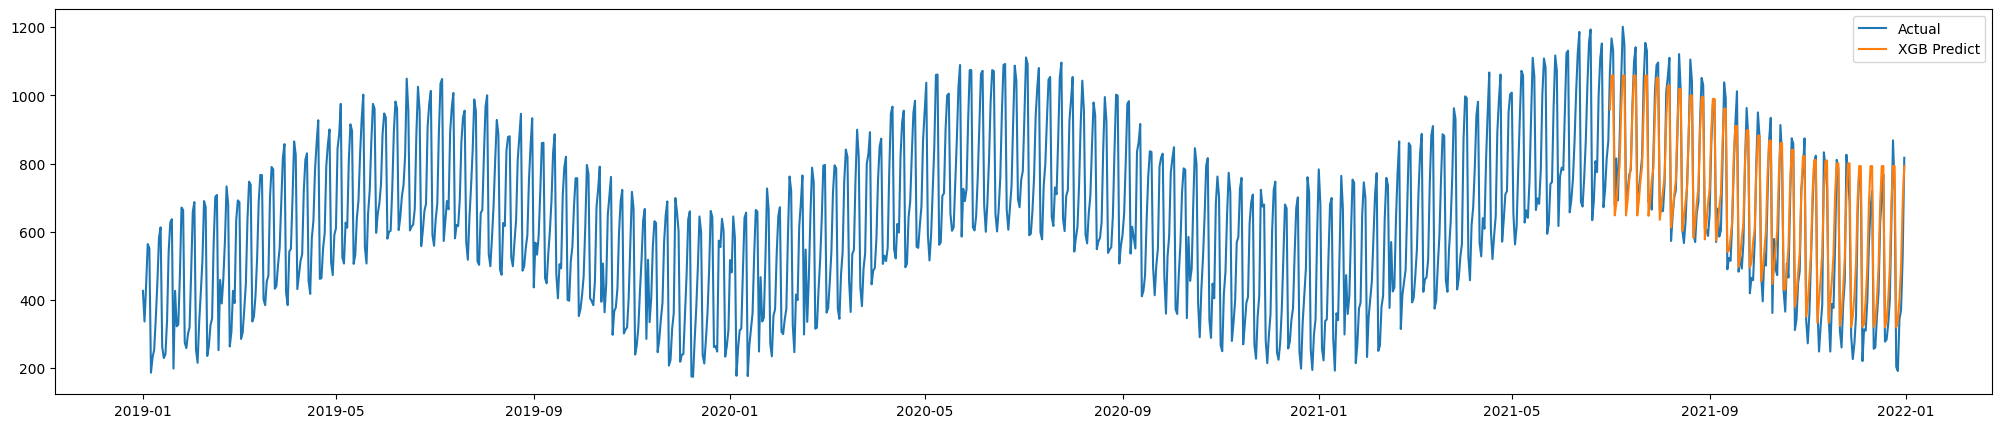

In [85]:
plt.figure(figsize = (25,5))
plt.plot(time_series.item_count, label = "Actual")
plt.plot(test.xgb_pred, label = "XGB Predict")
plt.legend()
plt.show()

 - The graph compares the predicted values from the XGBoost model to the actual test-values, and we can see that the predictions are reasonably close to the true values.

In [70]:
xgb_rmse = mean_squared_error(y_true = test.item_count, y_pred = test.xgb_pred, squared = False)
xgb_mae = mean_absolute_error(y_true = test.item_count, y_pred = test.xgb_pred)
xgb_r2_score = r2_score(y_true = test.item_count, y_pred = test.xgb_pred)
print("XGBoost :\nRMSE : {:.2f}\nMAE : {:.2f}\nR2_Score : {:.2f}".format(xgb_rmse,xgb_mae,xgb_r2_score*100))

XGBoost :
RMSE : 71.18
MAE : 58.45
R2_Score : 92.15


C:\Users\harsh\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [71]:
results['XGBoost'] = [xgb_rmse,xgb_mae,xgb_r2_score*100]
results = results.round(2)
results

Linear Regression  Random Forest  XGBoost
RMSE                 244.21          59.18    71.18
MAE                  196.04          46.71    58.45
R2_Score               7.65          94.58    92.15

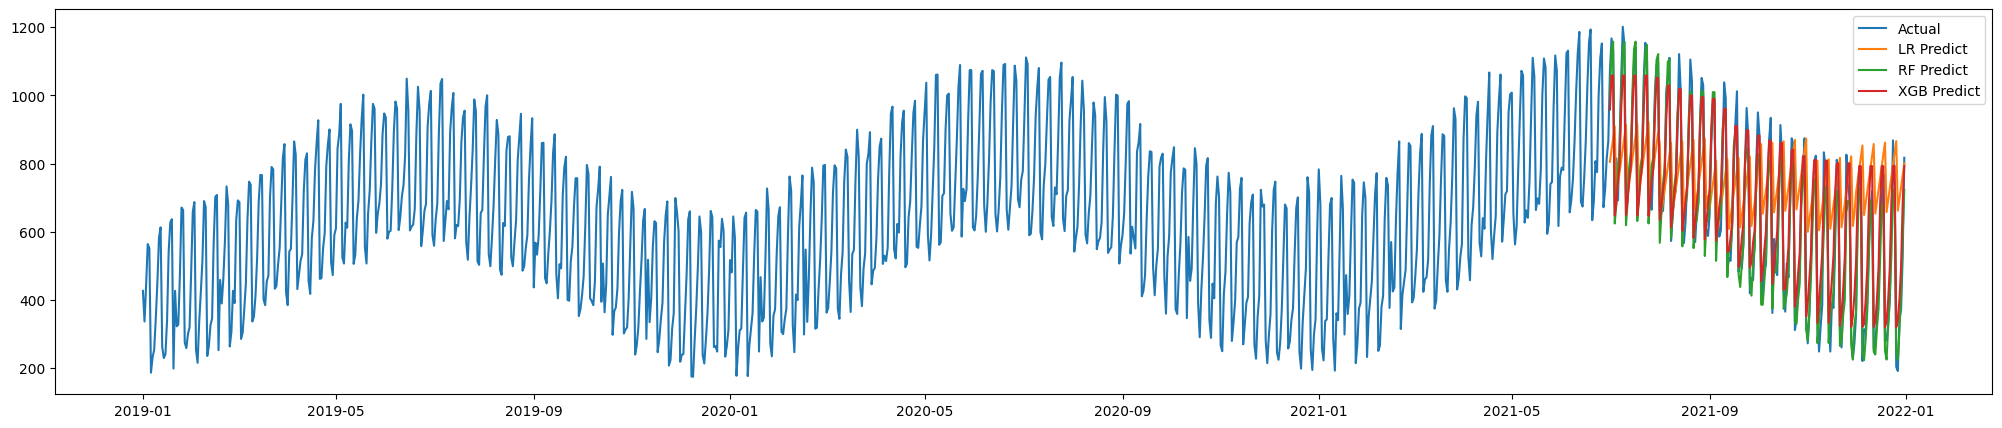

In [84]:
plt.figure(figsize = (25,5))
plt.plot(time_series.item_count, label = "Actual")
plt.plot(test.lr_pred, label = "LR Predict")
plt.plot(test.rf_pred, label = "RF Predict")
plt.plot(test.xgb_pred, label = "XGB Predict")
plt.legend()
plt.show()

 - The graph compares the actual test values with the predictions from three models (Linear Regression, Random Forest, and XGBoost) — and it is clear that the Random Forest model’s predictions align most closely with the actual values.

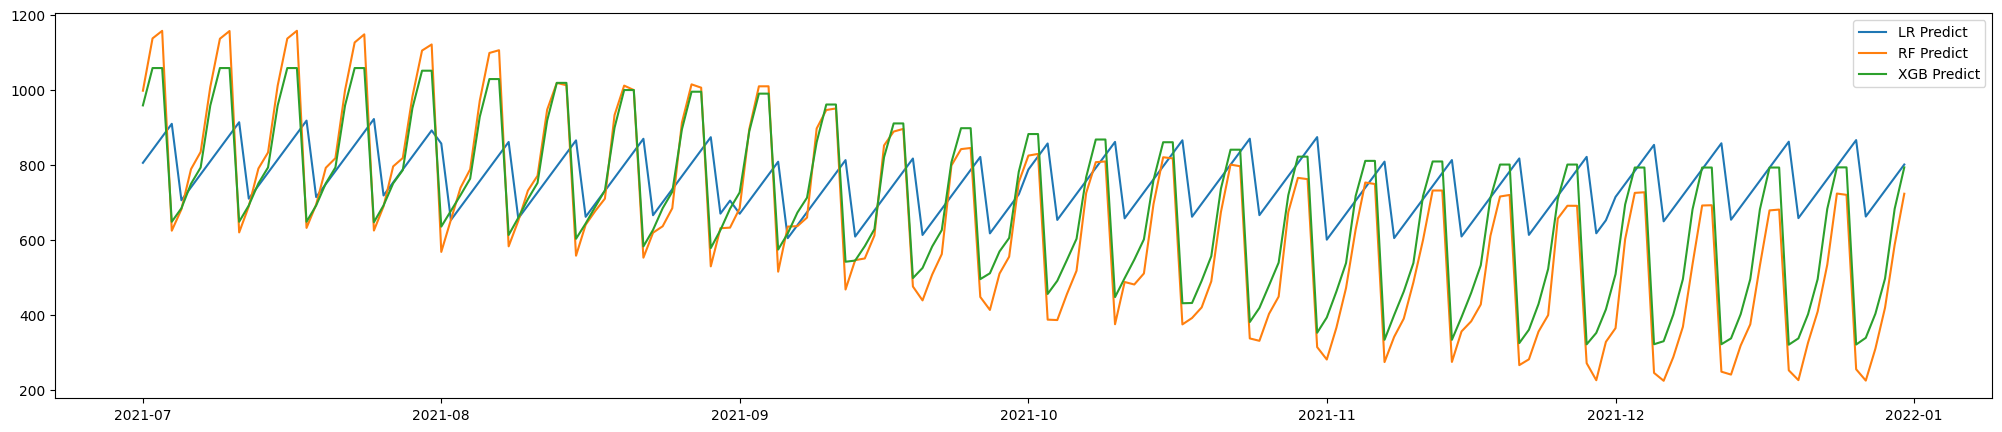

In [72]:
plt.figure(figsize = (25,5))
plt.plot(test.lr_pred, label = "LR Predict")
plt.plot(test.rf_pred, label = "RF Predict")
plt.plot(test.xgb_pred, label = "XGB Predict")
plt.legend()
plt.show()

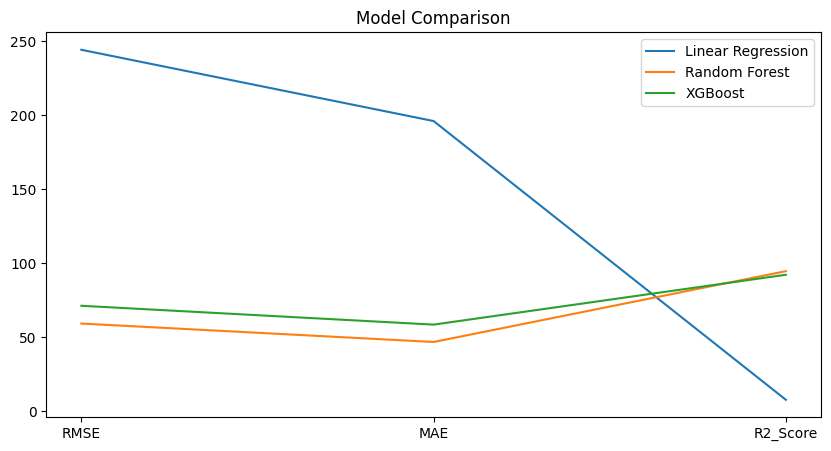

In [73]:
plt.figure(figsize = (10,5))
plt.plot(results['Linear Regression'], label = "Linear Regression")
plt.plot(results['Random Forest'], label = "Random Forest")
plt.plot(results['XGBoost'], label = "XGBoost")
plt.legend(loc = "upper right")
plt.title("Model Comparison")
plt.show()

In [74]:
results

Linear Regression  Random Forest  XGBoost
RMSE                 244.21          59.18    71.18
MAE                  196.04          46.71    58.45
R2_Score               7.65          94.58    92.15

 - the best model here is RF : using it for predictions

In [75]:
time_series.index.max()

Timestamp('2021-12-31 00:00:00')

In [76]:
future_predictors = pd.DataFrame(pd.date_range(start="2022-01-01", end="2022-12-31"), columns=['date'])
future_predictors.index = pd.to_datetime(future_predictors.date)

In [77]:
X_train.columns

Index(['weekday', 'quarter', 'year', 'month_name', 'day_year', 'day_month',
       'week_num'],
      dtype='object')

In [78]:
future_predictors.date.dt.isocalendar().week

date
2022-01-01    52
2022-01-02    52
2022-01-03     1
2022-01-04     1
2022-01-05     1
              ..
2022-12-27    52
2022-12-28    52
2022-12-29    52
2022-12-30    52
2022-12-31    52
Name: week, Length: 365, dtype: UInt32

In [79]:
future_predictors['weekday'] = future_predictors.date.dt.day_name()
future_predictors['quarter'] = future_predictors.date.dt.quarter
future_predictors['year'] = future_predictors.date.dt.year
future_predictors['month_name'] = future_predictors.date.dt.month_name()
future_predictors['day_year'] = future_predictors.date.dt.day_of_year
future_predictors['day_month'] = future_predictors.date.dt.day
future_predictors['week_num'] = future_predictors.date.dt.isocalendar().week

In [80]:
future_predictors.head(2)

date   weekday  quarter  year month_name  day_year  \
date                                                                  
2022-01-01 2022-01-01  Saturday        1  2022    January         1   
2022-01-02 2022-01-02    Sunday        1  2022    January         2   

            day_month  week_num  
date                             
2022-01-01          1        52  
2022-01-02          2        52

In [81]:
future_predictors[['month_name', 'weekday']] = ord_enc.transform(future_predictors[['month_name', 'weekday']])

In [82]:
future_predictors['predictions'] = rf.predict(future_predictors[X_train.columns])

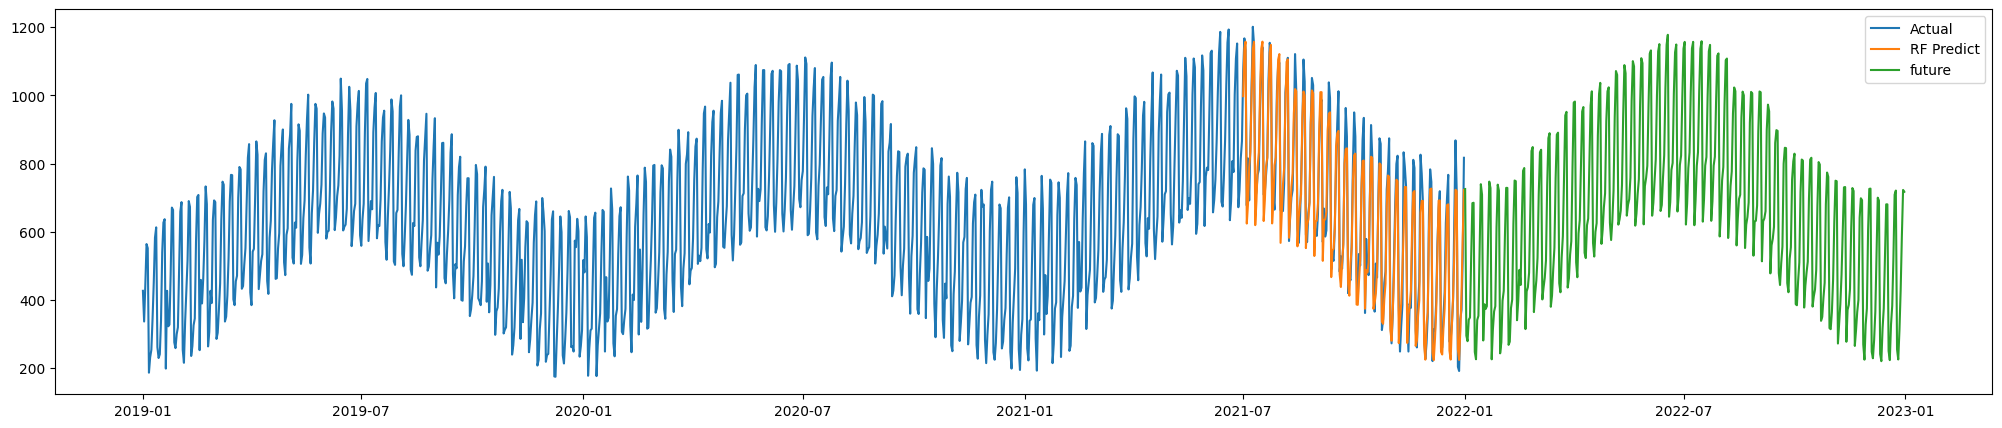

In [83]:
plt.figure(figsize = (25,5))
plt.plot(time_series.item_count, label = "Actual")
plt.plot(test.rf_pred, label = "RF Predict")
plt.plot(future_predictors.predictions, label = "future")
plt.legend()
plt.show()

 - Among the three models, the Random Forest model demonstrated the best performance, so we have used it to predict values for the next year. The blue line represents the historical data used for training and testing, the orange line shows the model’s predictions against the test values, and the green line shows the forecasted future values.
   
 - The strong alignment of the Random Forest predictions with the actual test values suggests the model captured meaningful relationships in the data and handled nonlinear patterns effectively.

 - Using the model to forecast future values provides actionable insights for planning—inventory, staffing, and marketing can be aligned with expected demand.

 - The colour‐coded visualization (blue for known data, orange for model fit, green for forecast) helps stakeholders clearly see past performance, model accuracy, and future expectations.

 - Although the forecast (green line) gives a promising outlook, future predictions should still be monitored and validated against actual results, since unexpected factors (e.g., new competitors, market shifts) can affect accuracy.

 - For further improvement, one might consider periodically retraining the model with new data, revisiting feature engineering, and evaluating model drift to maintain reliability over time.